# ChIP-seq

Additional resources:

- [Data Processing for Next Generation Sequencing](https://ss-lab-cancerunit.github.io/NGSdataProcessing/)
- ENCODE Data Standards and Processing Pipeline Information for [Histone](https://www.encodeproject.org/chip-seq/histone/) and [Transcription Factors](https://www.encodeproject.org/chip-seq/transcription_factor/)
- [ChIP-seq guidelines and practices of the ENCODE and modENCODE consortia](https://genome.cshlp.org/content/22/9/1813): An older paper but a good outline of general best practices.
- [Hands-on introduction to ChIP-seq analysis](https://www.bio.ens.psl.eu/~mthomas/other/chip-seq-training/): An older tutorial but can provide some useful practice and alternatives.

# Introduction

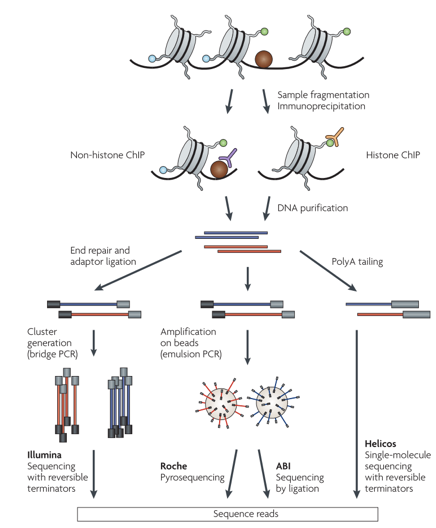
ChIP-seq is used to map the location of proteins on DNA/chromatin, such as transcription factors (non-histone-ChIP) or modified histones (histone-ChIP). Precipitated fragments are sequenced using next-generation sequencing. For more info, see the [review paper](https://www.nature.com/articles/nrg2641) by Park et al., in Nature Reviews Genetics, 2009.

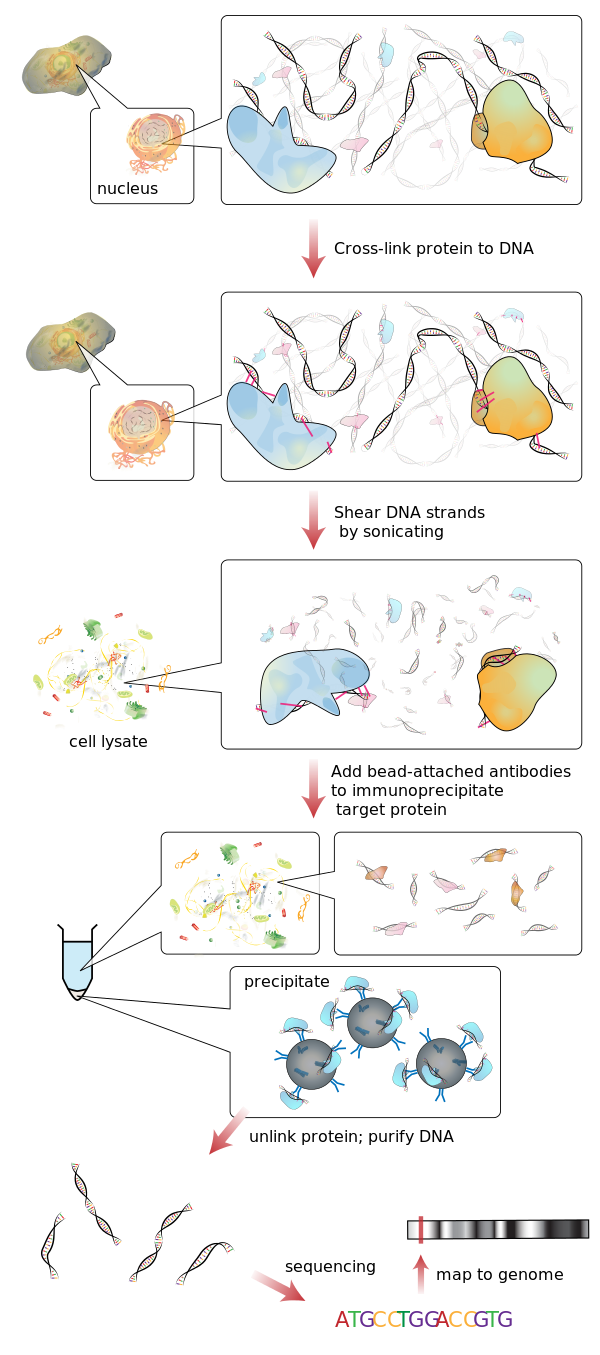
Here's another illustration - from Wikipedia, see https://en.wikipedia.org/wiki/ChIP-sequencing

# TF ChIP-seq

### Data from GEO

In this lesson we will analyze ChIP-seq data to identify binding sites of TP53. ChIP was performed in MCF-7 cells, after treatment with nutlin-3a, using an antibody against TP53. The original data at GEO is here https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE47041. 

### To download the raw FASTQ files from SRA (starting from a GEO entry):
If you follow the link to SRA you will find each run as a separate SRR entry, for example the nutlin-3a treated cells (S = "Stimulated") are here: https://www.ncbi.nlm.nih.gov/sra?term=SRX285808. On that page, you will find the SRR ID of that sequencing run, which is SRR866627. 

In a Bash cell, download the FASTQ data using the SRA-toolbox command `fastq-dump`.
For example this will download the entire FASTQ file:
`fastq-dump -O /mnt/storage/$USER/ SRR866627`



Test fastq-dump to see if it finds the SRR data; just retrieve a couple of reads (-X 5), and write to standard out (-Z)

In [1]:
fastq-dump -X 5 -Z SRR866627

Read 5 spots for SRR866627
Written 5 spots for SRR866627
@SRR866627.1 HWI-ST571:161:D0YP4ACXX:3:1101:1437:2055 length=51
NCGAAAGACTGCTGGCCGACGTCGAGGTCCCGATTGTCGGCGTCGGCGGCA
+SRR866627.1 HWI-ST571:161:D0YP4ACXX:3:1101:1437:2055 length=51
#1:AABDDH<?CF<CFHH@D:??FAEE6?FHDAA=@CF@4@EBA88@;575
@SRR866627.2 HWI-ST571:161:D0YP4ACXX:3:1101:1423:2163 length=51
GAAATACTGTCTCTACTAAAAATACAAAAAGTAGCCAGGCGTCGTGGTGCA
+SRR866627.2 HWI-ST571:161:D0YP4ACXX:3:1101:1423:2163 length=51
B@CFFFFFHHHHGIJJJJIJJJIJJJJIJJIEGHIJJJJIJIIIHIE=FGC
@SRR866627.3 HWI-ST571:161:D0YP4ACXX:3:1101:1534:2014 length=51
NGATCGGAAGAGCACACGTCTGAACTCCAGTCACGTGGCCTTATCTCGTAT
+SRR866627.3 HWI-ST571:161:D0YP4ACXX:3:1101:1534:2014 length=51
#1:DDDFFHFDHFEGIFDGGCDHIGIIEGHDGGGDHGIIJJJIGHIG>GHI
@SRR866627.4 HWI-ST571:161:D0YP4ACXX:3:1101:1517:2238 length=51
TTTGTCTAGGAAATAACCGTCAGGATTGACACCCTCCCAATTGTATGTTTT
+SRR866627.4 HWI-ST571:161:D0YP4ACXX:3:1101:1517:2238 length=51
@CCFFFFFHHHHHJJJJJJGIJJJJJJJJIJJJJIJJJHGIIJHIIIFIII
@SRR866627.5 HW

### Use the ChIP-seq data for the p53 case study directly from the linux server 
For the exercise in class, we have extracted all the reads that map to <b>chromosome 19</b>, the FASTQ file with that subset of reads can be found here: /mnt/storage/data/chipseq/p53/. You can create a symbolic link to the .fastq files in that folder (do not copy them to your folders !). 


### Data from ChIP-atlas.org

You can also find this data set at http://chip-atlas.org/view?id=SRX285808

There you can also download the bigWig file (see further below) and the BED file with the peaks (see further below).
For the raw data, chip-atlas.org links to the SRA.

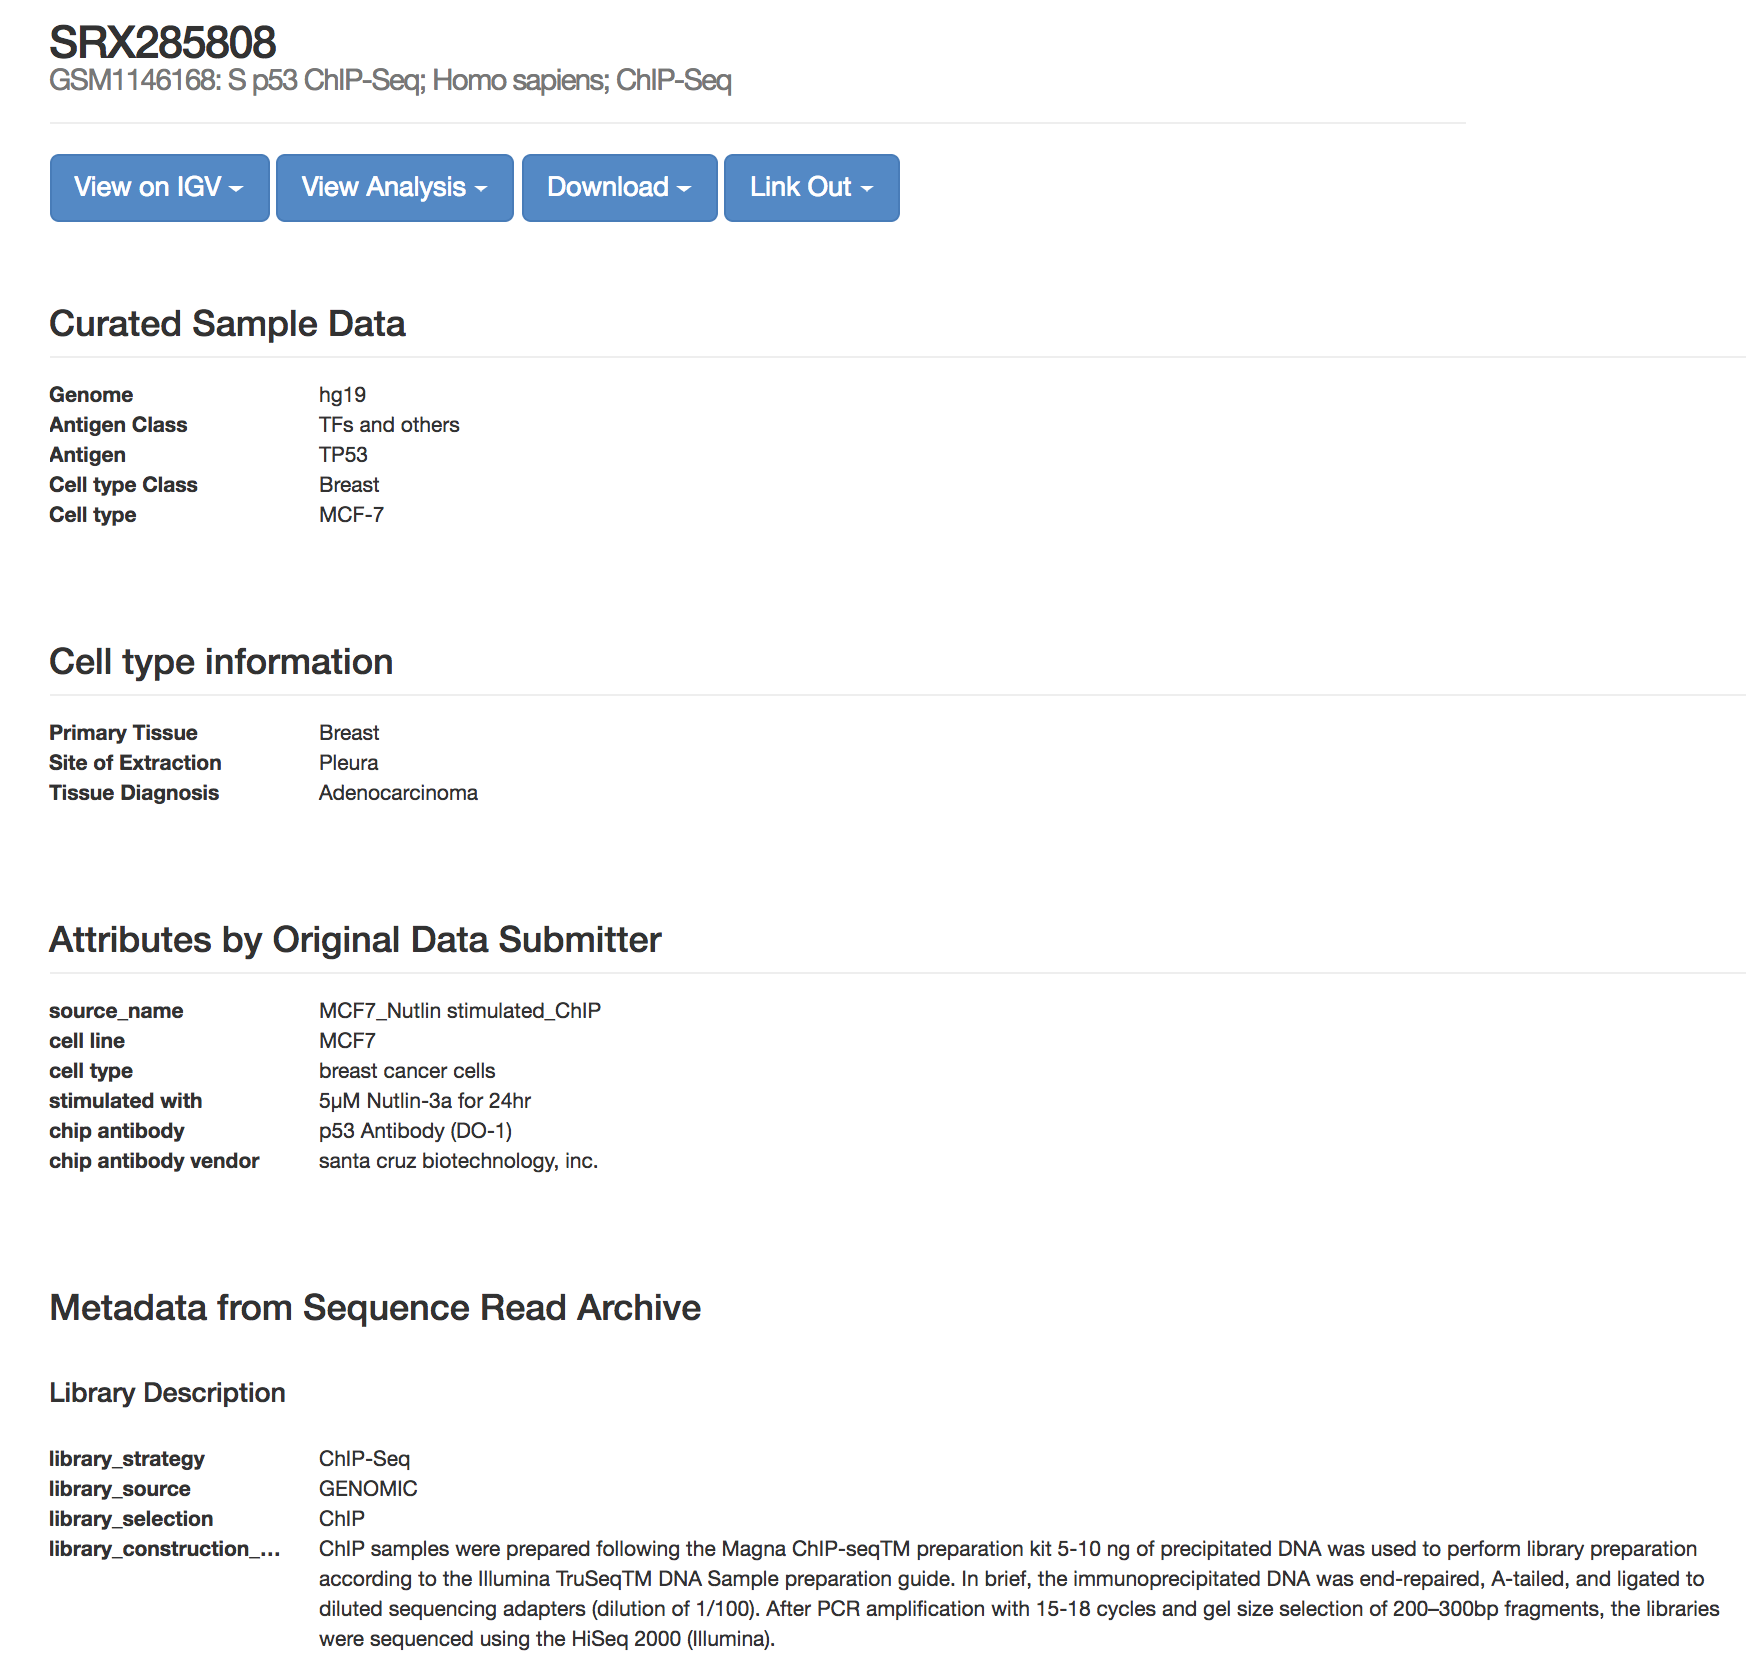

### Data from ReMap

The data set is also in ReMap, but there you can only download the peak files. 
They do provide a link to the GEO page, from where you can get to SRA to the raw data.

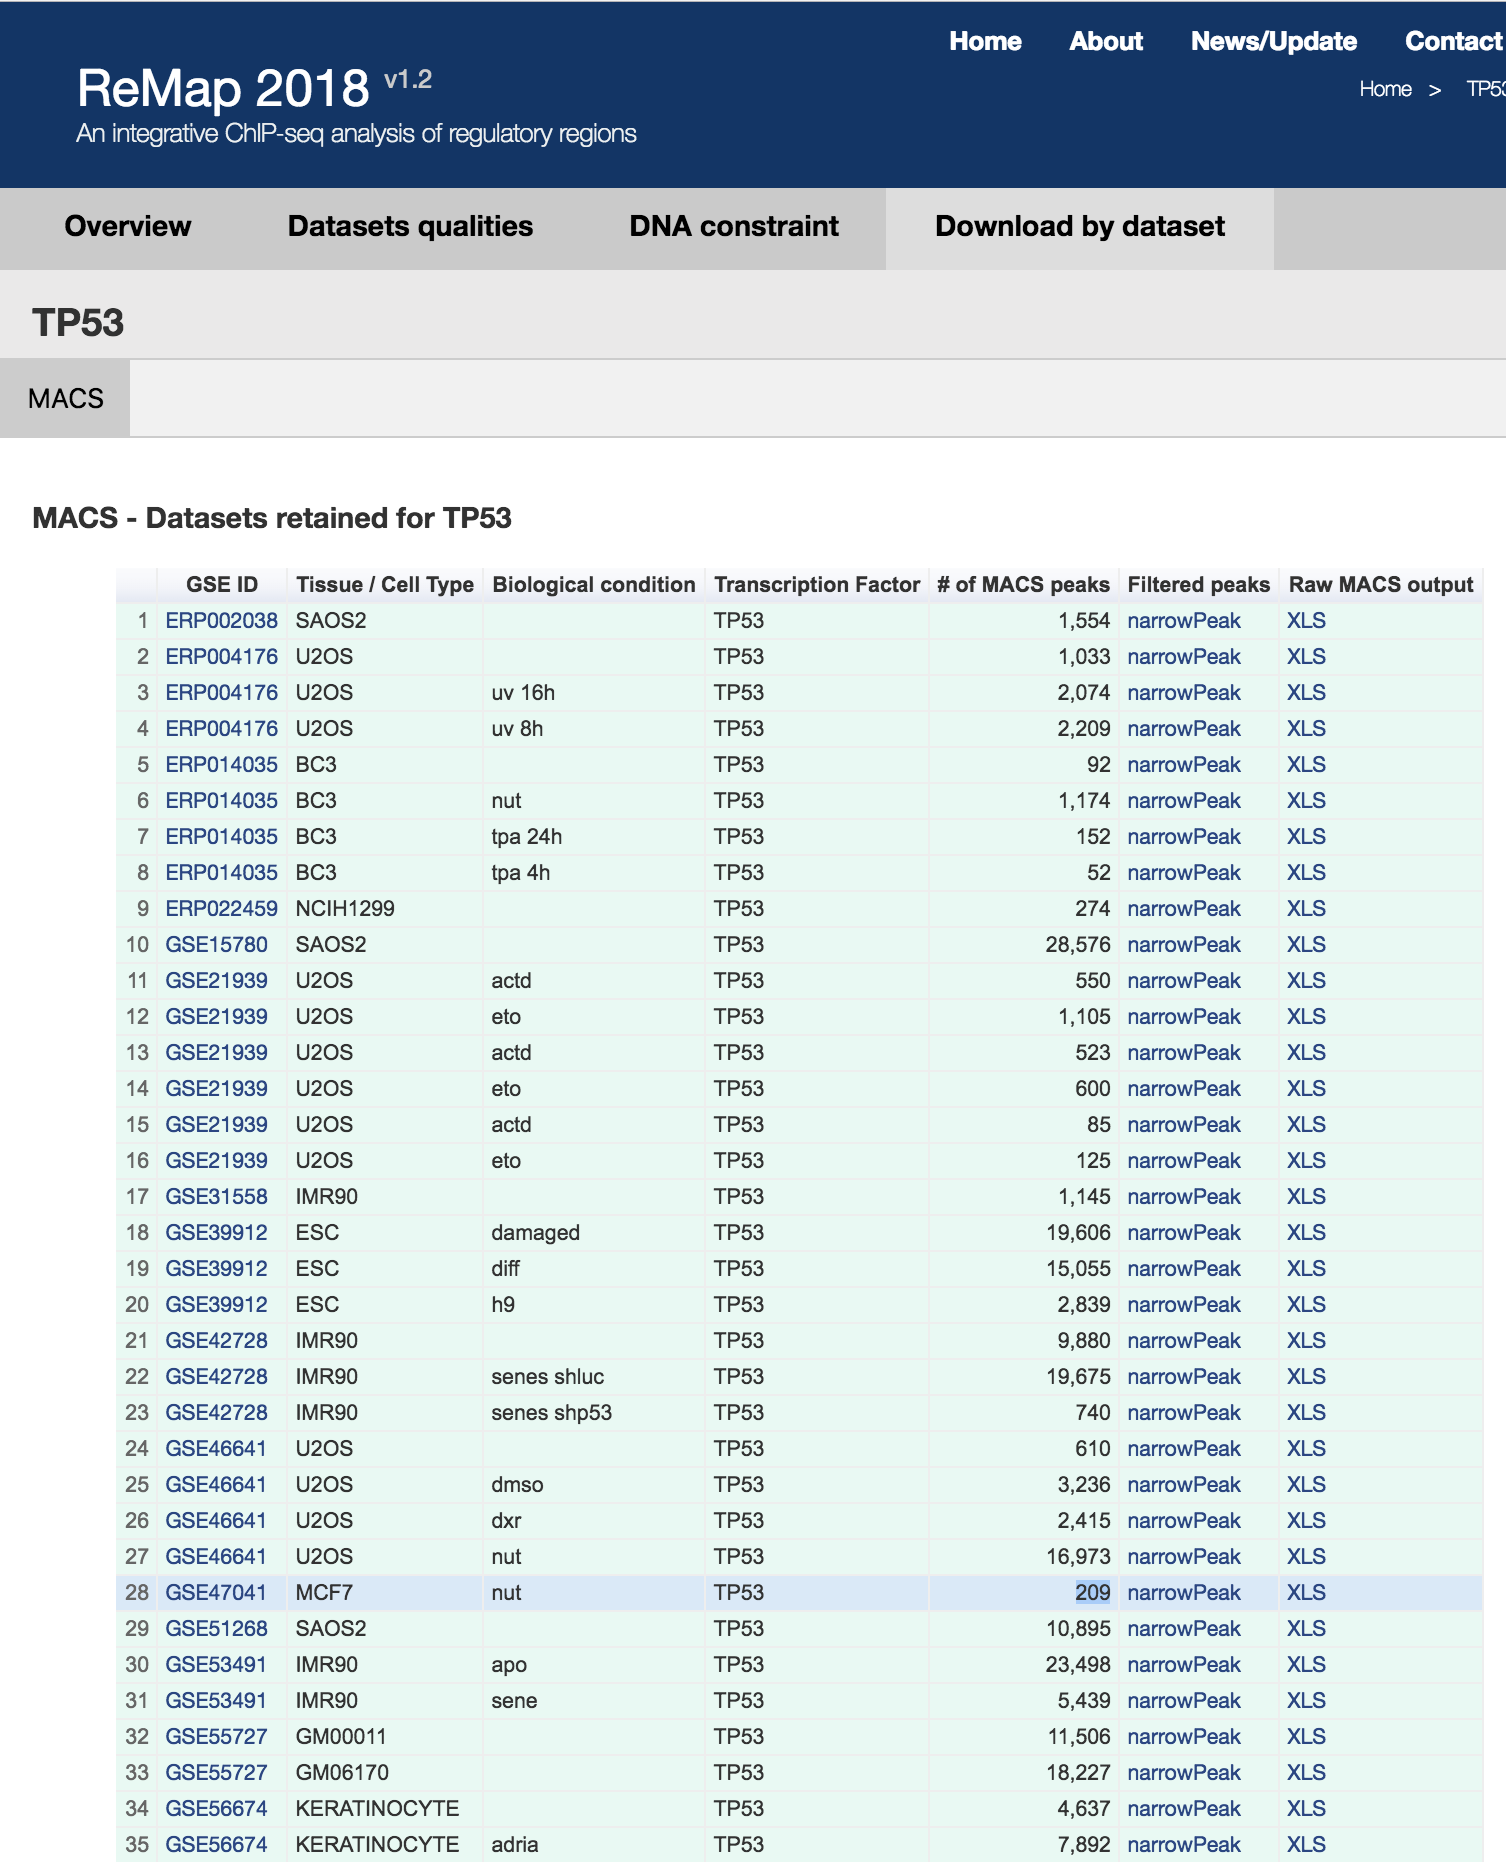

### For more information about ChIP-seq data analysis:
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3828144/
* https://github.com/crazyhottommy/ChIP-seq-analysis
* http://www.biologie.ens.fr/~mthomas/other/chip-seq-training/
* https://hbctraining.github.io/Intro-to-ChIPseq-flipped/schedule/links-to-lessons.html
* http://dputhier.github.io/EBA_2015_ChIP-Seq/slides/chipseq_CarlHerrmann_Roscoff2015.pdf

First we will set the directory where we will work, and cd into that directory

In [2]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/chipseq/
cd /mnt/storage/$USER/jupyternotebooks/chipseq/

For the exercise in class, you can create a symbolic link to the FASTQ files in this directory: /mnt/storage/data/chipseq/p53/. This will avoid copying the same file for every student

In [3]:
ln -sf /mnt/storage/data/chipseq/p53/*.fastq .

In [4]:
ls -lt *.fastq

lrwxrwxrwx 1 u0160030 domain users 57 Oct 14 22:05 ChIP_input_MCF7-chr19.fastq -> /mnt/storage/data/chipseq/p53/ChIP_input_MCF7-chr19.fastq
lrwxrwxrwx 1 u0160030 domain users 50 Oct 14 22:05 ChIP_p53_chr19.fastq -> /mnt/storage/data/chipseq/p53/ChIP_p53_chr19.fastq


The ls -l command shows the listing of files in the current directory. You can see one link, to the fastq file with reads that map onto chr19

To download the entire data set, you can do the following: 
Be careful, this takes a lot of space. After mapping, immediately delete the fastq files!

In [ ]:
# fastq-dump -O /mnt/storage/$USER/jupyternotebooks/chipseq SRR866627

## Check read quality

In [5]:
fastqc ChIP_p53_chr19.fastq

Started analysis of ChIP_p53_chr19.fastq
Approx 5% complete for ChIP_p53_chr19.fastq
Approx 10% complete for ChIP_p53_chr19.fastq
Approx 15% complete for ChIP_p53_chr19.fastq
Approx 20% complete for ChIP_p53_chr19.fastq
Approx 25% complete for ChIP_p53_chr19.fastq
Approx 30% complete for ChIP_p53_chr19.fastq
Approx 35% complete for ChIP_p53_chr19.fastq
Approx 40% complete for ChIP_p53_chr19.fastq
Approx 45% complete for ChIP_p53_chr19.fastq
Approx 50% complete for ChIP_p53_chr19.fastq
Approx 55% complete for ChIP_p53_chr19.fastq
Approx 60% complete for ChIP_p53_chr19.fastq
Approx 65% complete for ChIP_p53_chr19.fastq
Approx 70% complete for ChIP_p53_chr19.fastq
Approx 75% complete for ChIP_p53_chr19.fastq
Approx 80% complete for ChIP_p53_chr19.fastq
Approx 85% complete for ChIP_p53_chr19.fastq
Approx 90% complete for ChIP_p53_chr19.fastq
Approx 95% complete for ChIP_p53_chr19.fastq
Analysis complete for ChIP_p53_chr19.fastq


In [6]:
ls -lt | head

total 1212
-rw-r--r-- 1 u0160030 domain users 742865 Oct 14 22:06 ChIP_p53_chr19_fastqc.html
-rw-r--r-- 1 u0160030 domain users 493102 Oct 14 22:06 ChIP_p53_chr19_fastqc.zip
lrwxrwxrwx 1 u0160030 domain users     57 Oct 14 22:05 ChIP_input_MCF7-chr19.fastq -> /mnt/storage/data/chipseq/p53/ChIP_input_MCF7-chr19.fastq
lrwxrwxrwx 1 u0160030 domain users     50 Oct 14 22:05 ChIP_p53_chr19.fastq -> /mnt/storage/data/chipseq/p53/ChIP_p53_chr19.fastq


Check the number of reads we have

In [7]:
wc -l ChIP_p53_chr19.fastq | awk '{ print $1/4 }'

177768


Copy the `ChIP_p53_chr19_fastqc.zip` file to your computer, extract it, and open `fastqc_report.html`. For this data set, the sequencing quality scores are very good.

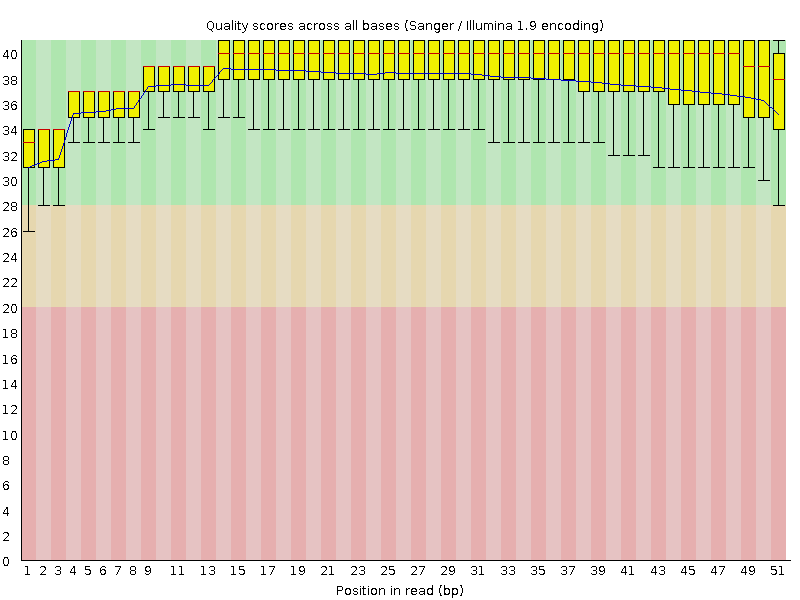

## Alignment of p53 ChIP-seq reads

To align the reads to the genome, we will use bowtie2. As reference genome, you can use the whole genome bowtie index at this location /mnt/storage/data/resources/bowtie2. Alternatively, you can use bwa-mem to align reads. Here we will align to hg19 human assembly. 

In [8]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 ChIP_p53_chr19.fastq -S ChIP_p53.sam

177768 reads; of these:
  177768 (100.00%) were unpaired; of these:
    2586 (1.45%) aligned 0 times
    144303 (81.17%) aligned exactly 1 time
    30879 (17.37%) aligned >1 times
98.55% overall alignment rate


Check a couple of lines in the SAM file

In [9]:
head -500 ChIP_p53.sam | tail -5

HWI-ST571:161:D0YP4ACXX:4:1209:16161:41710	0	chr19	406092	42	51M	*	0	0	AAAGGCCATAGCCAGGTCCCCCCAGCTGCCTCCTGGGCTCCGACCCACCCA	@@@BB;DD?FDH?@E9?DGCGBEGFB*:BDGGDDB?@@BDB:@GF@=?E=?	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YT:Z:UU
HWI-ST571:161:D0YP4ACXX:3:1302:7562:88528	0	chr19	406092	42	51M	*	0	0	AAAGGCCATAGCCAGGTCCCCCCAGCTGCCTCCTGGGCTCCGACCCACCCA	CCCFFFFFHGHHHJJJHIJJJJIJIIJJJJJJJJJJJIIJIJJIIGIHHHF	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YT:Z:UU
HWI-ST571:161:D0YP4ACXX:3:1307:18386:35231	0	chr19	406092	42	51M	*	0	0	AAAGGCCATAGCCAGGTCCCCCCAGCTGCCTCCTGGGCTCCGACCCACCCA	@C@FDFFFHHHHGGHGCGIIJJHIIIJJJEHHIEIIIEIIGGGIJJJHHFB	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YT:Z:UU
HWI-ST571:161:D0YP4ACXX:4:1302:10890:10304	0	chr19	406239	42	51M	*	0	0	GGGGTGGCAGCCCCCAGCGAGGACGGATGGGCCATAGGGCTGCTCTCTGGG	CCCFDFFFHHGHHJJJJIJGIIHJJJJIIJI(BEHIIHHHHFFFFFEEEEE	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:51	YT:Z:UU
HWI-ST571:161:D0YP4ACXX:4:1111:10152:3292	0	chr19	406480	42	51M	*	0	0

Convert the SAM file to BAM format (binary)

In [10]:
samtools view -S -b ChIP_p53.sam > ChIP_p53.bam

We can delete the SAM file now to save space

In [11]:
rm ChIP_p53.sam

How many reads are in the BAM file?


In [12]:
samtools view -c ChIP_p53.bam

177768


How many of these reads are mapped?

You can use the option `-F 260` to only output reads that are not unmapped (`UNMAP: 0x4 = 4` is not set) and only primary alignment (`SECONDARY: 0x100 = 256` is not set) see http://samtools.sourceforge.net/samtools.shtml

Here you can decode SAM Flags http://broadinstitute.github.io/picard/explain-flags.html


In [13]:
# List all SAM flags.
samtools flags


About: Convert between textual and numeric flag representation
Usage: samtools flags INT|STR[,...]

Flags:
	0x1	PAIRED        .. paired-end (or multiple-segment) sequencing technology
	0x2	PROPER_PAIR   .. each segment properly aligned according to the aligner
	0x4	UNMAP         .. segment unmapped
	0x8	MUNMAP        .. next segment in the template unmapped
	0x10	REVERSE       .. SEQ is reverse complemented
	0x20	MREVERSE      .. SEQ of the next segment in the template is reversed
	0x40	READ1         .. the first segment in the template
	0x80	READ2         .. the last segment in the template
	0x100	SECONDARY     .. secondary alignment
	0x200	QCFAIL        .. not passing quality controls
	0x400	DUP           .. PCR or optical duplicate
	0x800	SUPPLEMENTARY .. supplementary alignment



In [15]:
# Get correct flag settings for samtools view (second column).
samtools flags UNMAP,SECONDARY

0x104	260	UNMAP,SECONDARY


In [16]:
# Number of mapped reads.
samtools view -c -F 260 ChIP_p53.bam

175182


Now we are going to create the .bai index so we can use the BAM file in IGV

In [17]:
samtools sort -O bam -o ChIP_p53.sorted.bam ChIP_p53.bam

In [18]:
samtools index ChIP_p53.sorted.bam

In [19]:
ls

ChIP_input_MCF7-chr19.fastq  ChIP_p53_chr19_fastqc.zip
ChIP_p53.bam                 ChIP_p53.sorted.bam
ChIP_p53_chr19.fastq         ChIP_p53.sorted.bam.bai
ChIP_p53_chr19_fastqc.html


## Check your BAM file in IGV

Copy the `ChIP_p53.sorted.bam` and `ChIP_p53.sorted.bam.bai` to your computer and open them with IGV. Go to `BBC3` (type the gene name in the search box and press "Go"). BBC3 is a target gene of TP53, located on chr19. You will see an enrichment of reads, a "peak" in the first intron of BBC3.


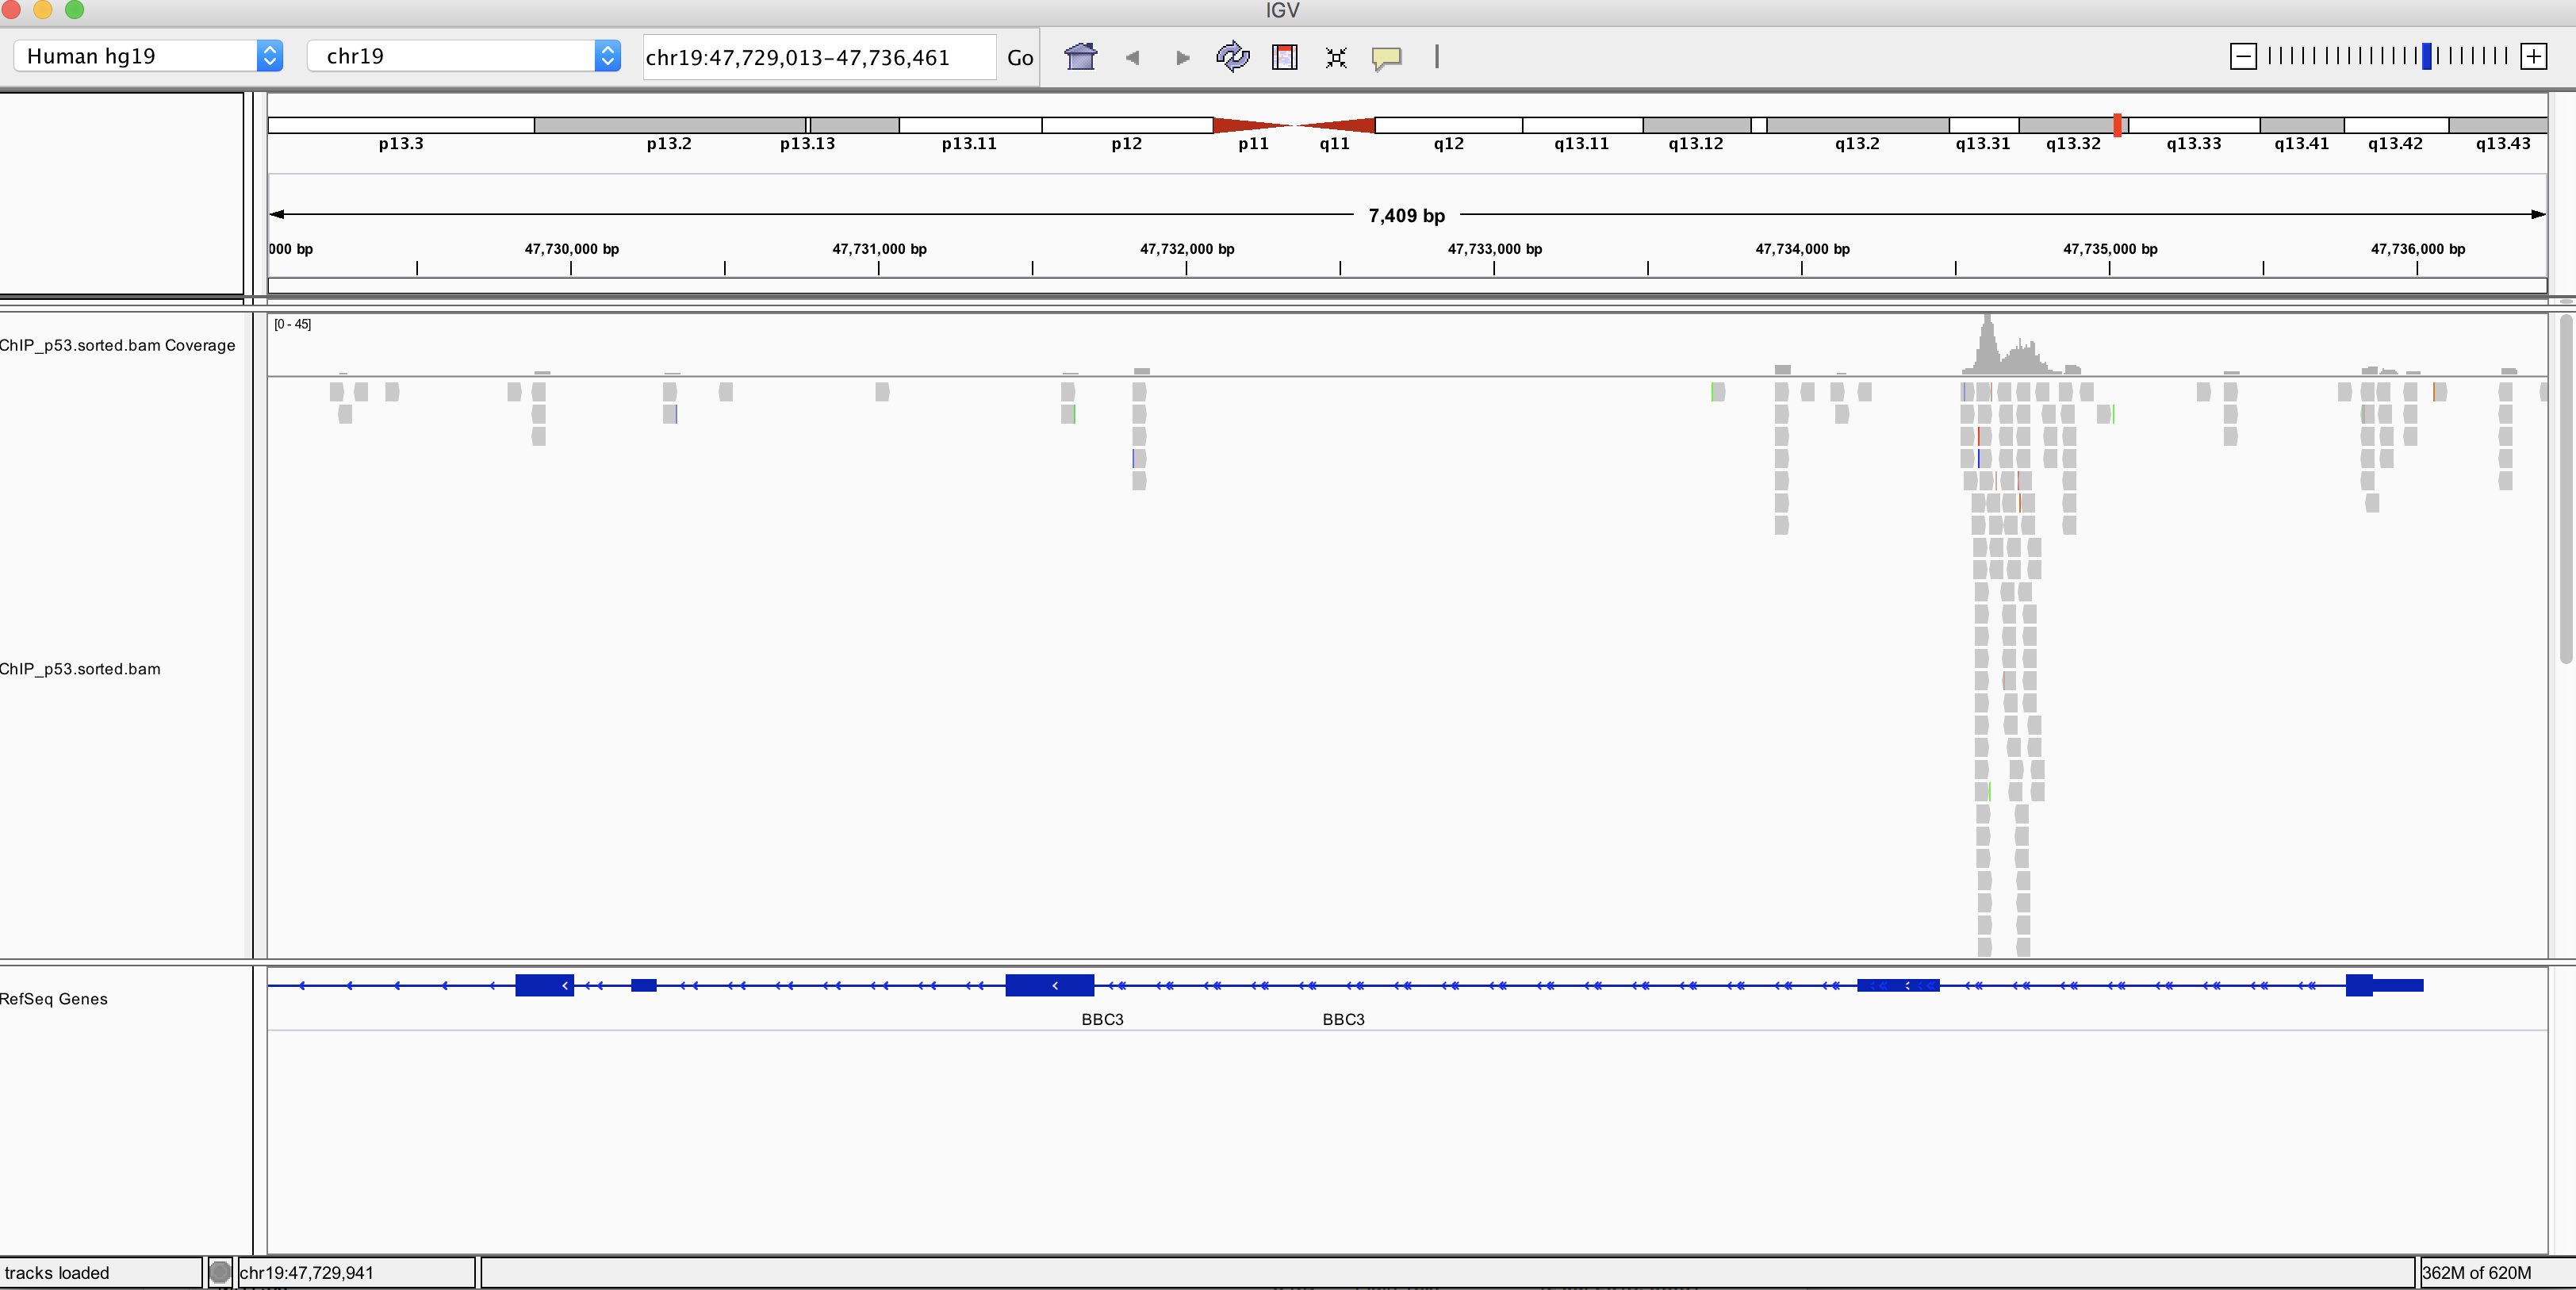

## The BAM file of the whole genome

We have aligned all the FASTQ reads to the genome. The resulting BAM file is here:
* on the linux server: `/mnt/storage/data/chipseq/p53/p53-full.bam`
* on the website: http://students.aertslab.org/p53-full.bam 

You can load this `p-53-full.bam` file in IGV, directly using the URL, by choosing File-Load From Url.
The bottom track is the `p53-full.bam` file. This way you can verify your alignment, is should be similar (not necessarily identical).

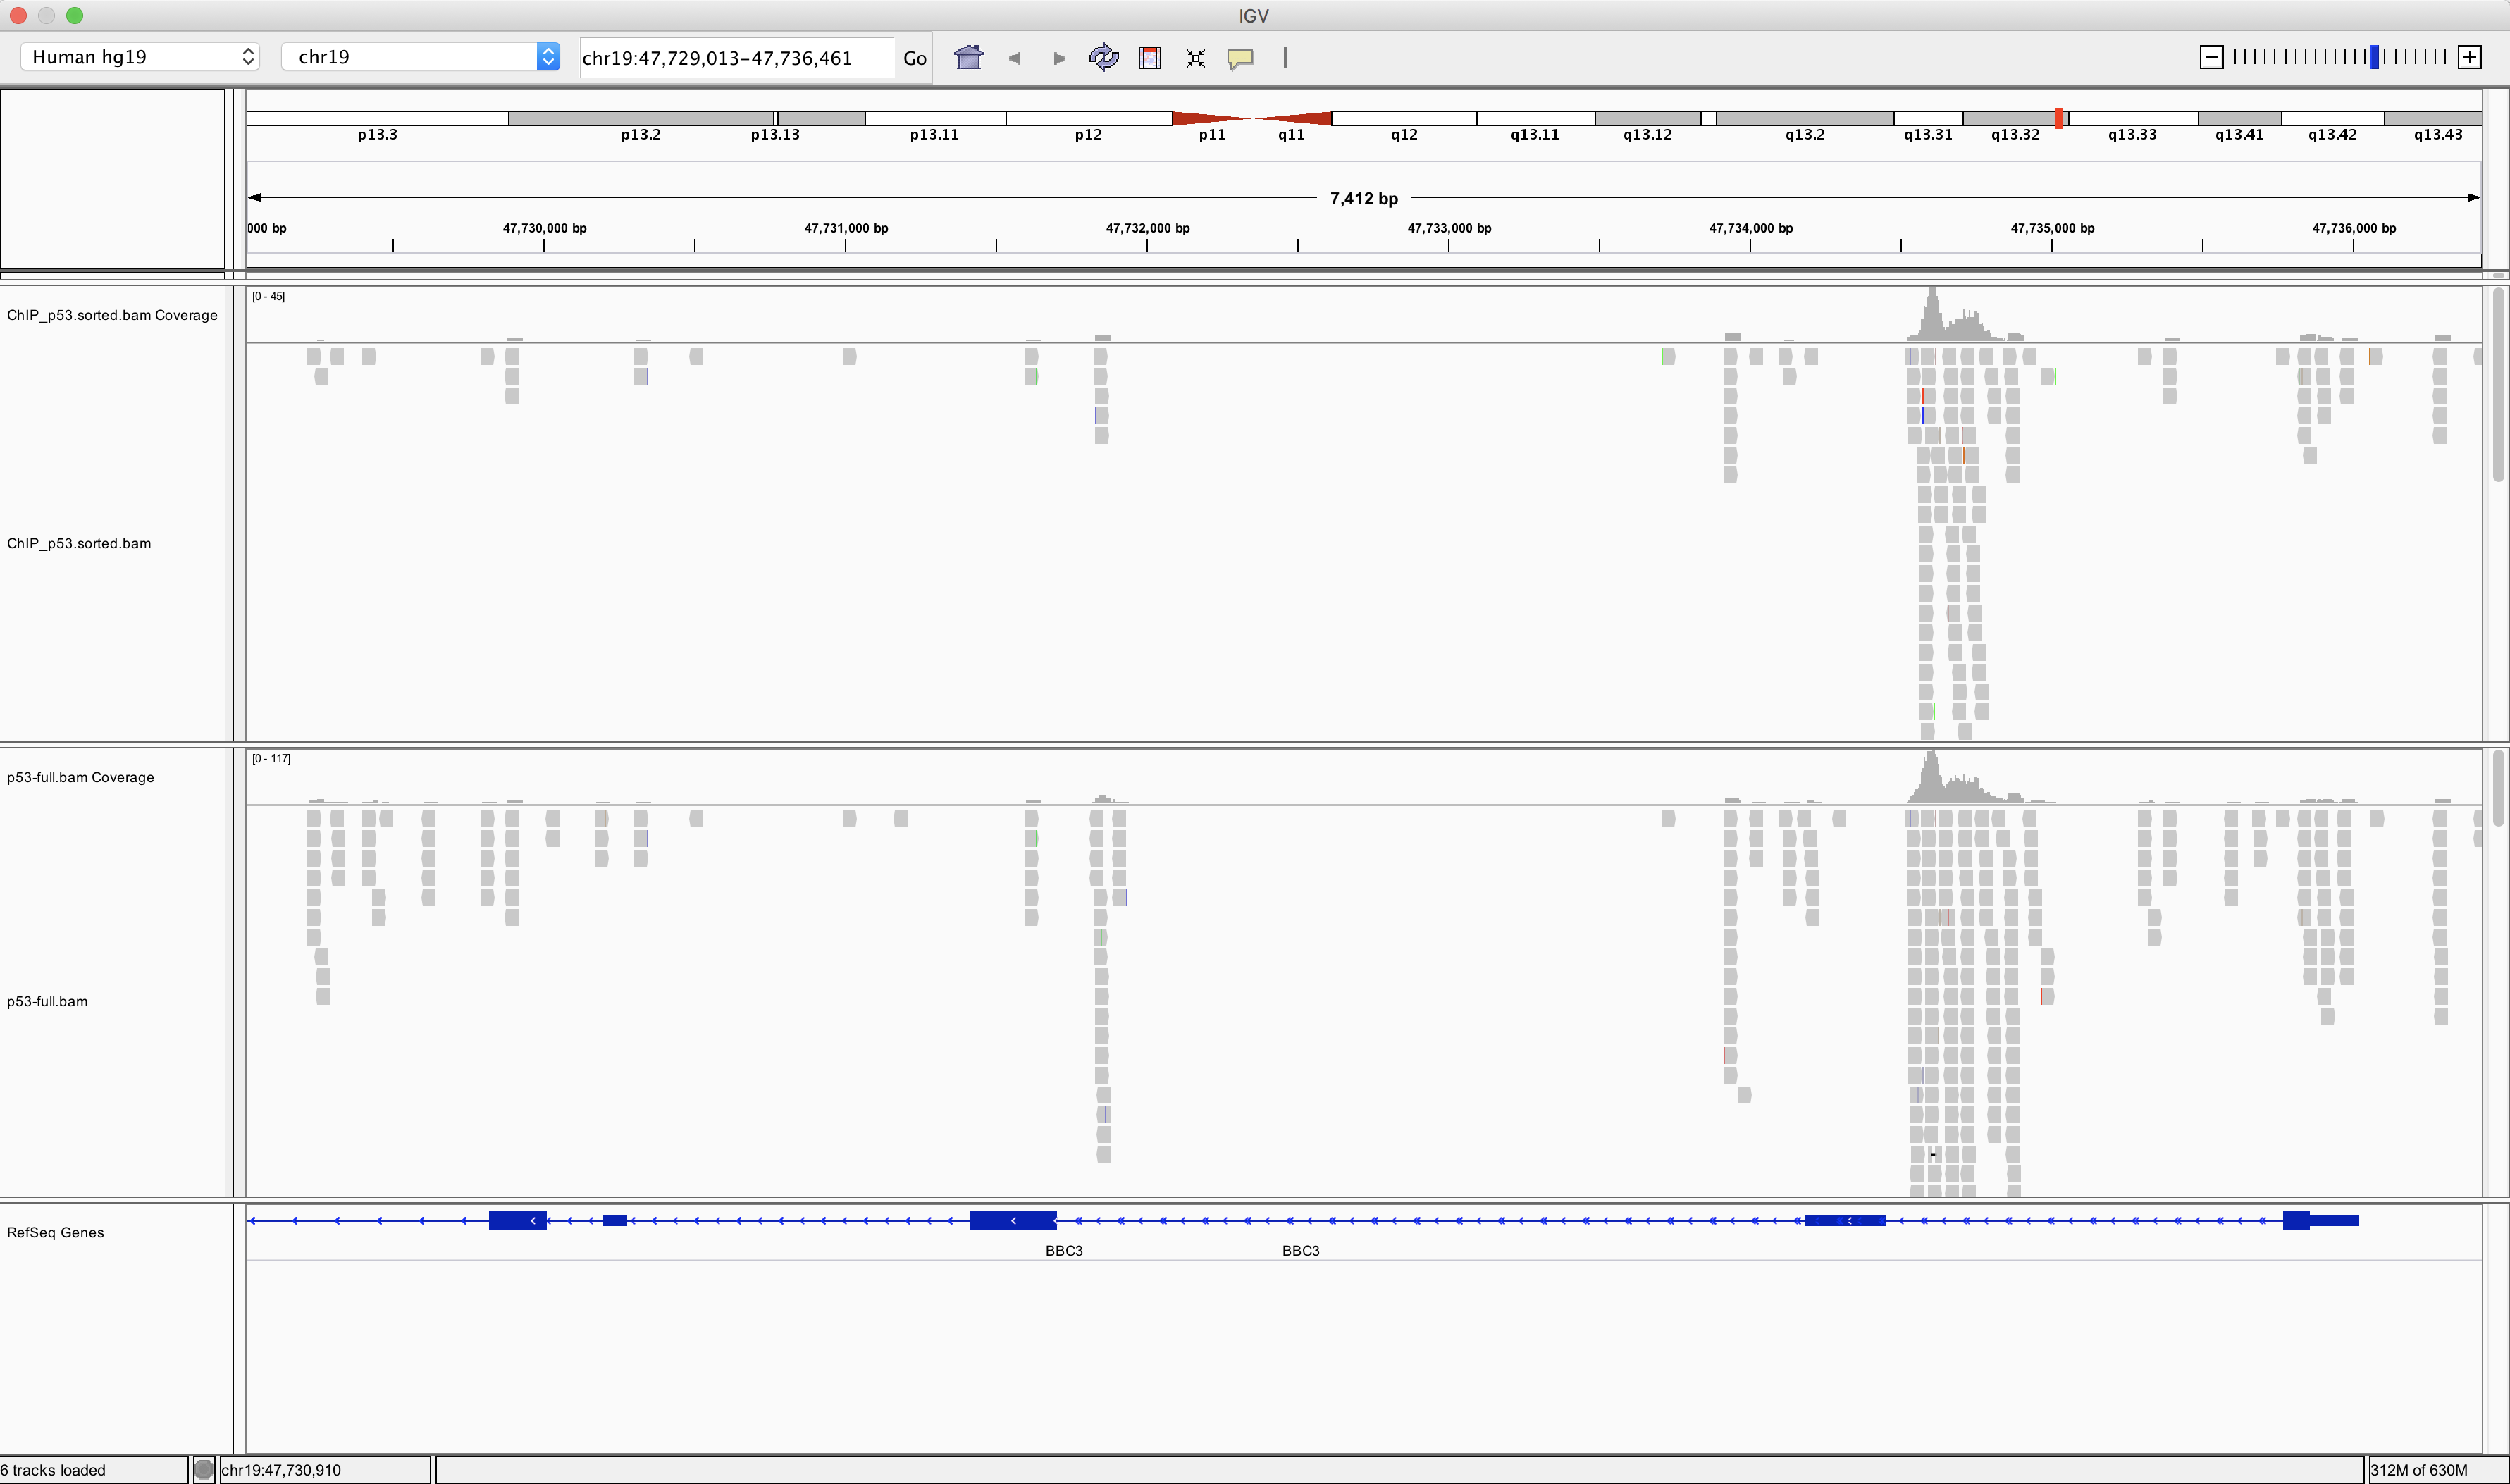

## Alignment of the control data ("input")

In [20]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 ChIP_input_MCF7-chr19.fastq -S ChIP_input_MCF7-chr19.sam

334156 reads; of these:
  334156 (100.00%) were unpaired; of these:
    10685 (3.20%) aligned 0 times
    207768 (62.18%) aligned exactly 1 time
    115703 (34.63%) aligned >1 times
96.80% overall alignment rate


Convert to BAM file

In [21]:
samtools view -S -b ChIP_input_MCF7-chr19.sam > ChIP_input_MCF7-chr19.bam

Delete the SAM file again

In [22]:
rm ChIP_input_MCF7-chr19.sam

Count reads

In [23]:
samtools view -c ChIP_input_MCF7-chr19.bam

334156


Sort and index

In [24]:
samtools sort -O bam -o ChIP_input_MCF7-chr19.sorted.bam ChIP_input_MCF7-chr19.bam

In [25]:
samtools index ChIP_input_MCF7-chr19.sorted.bam

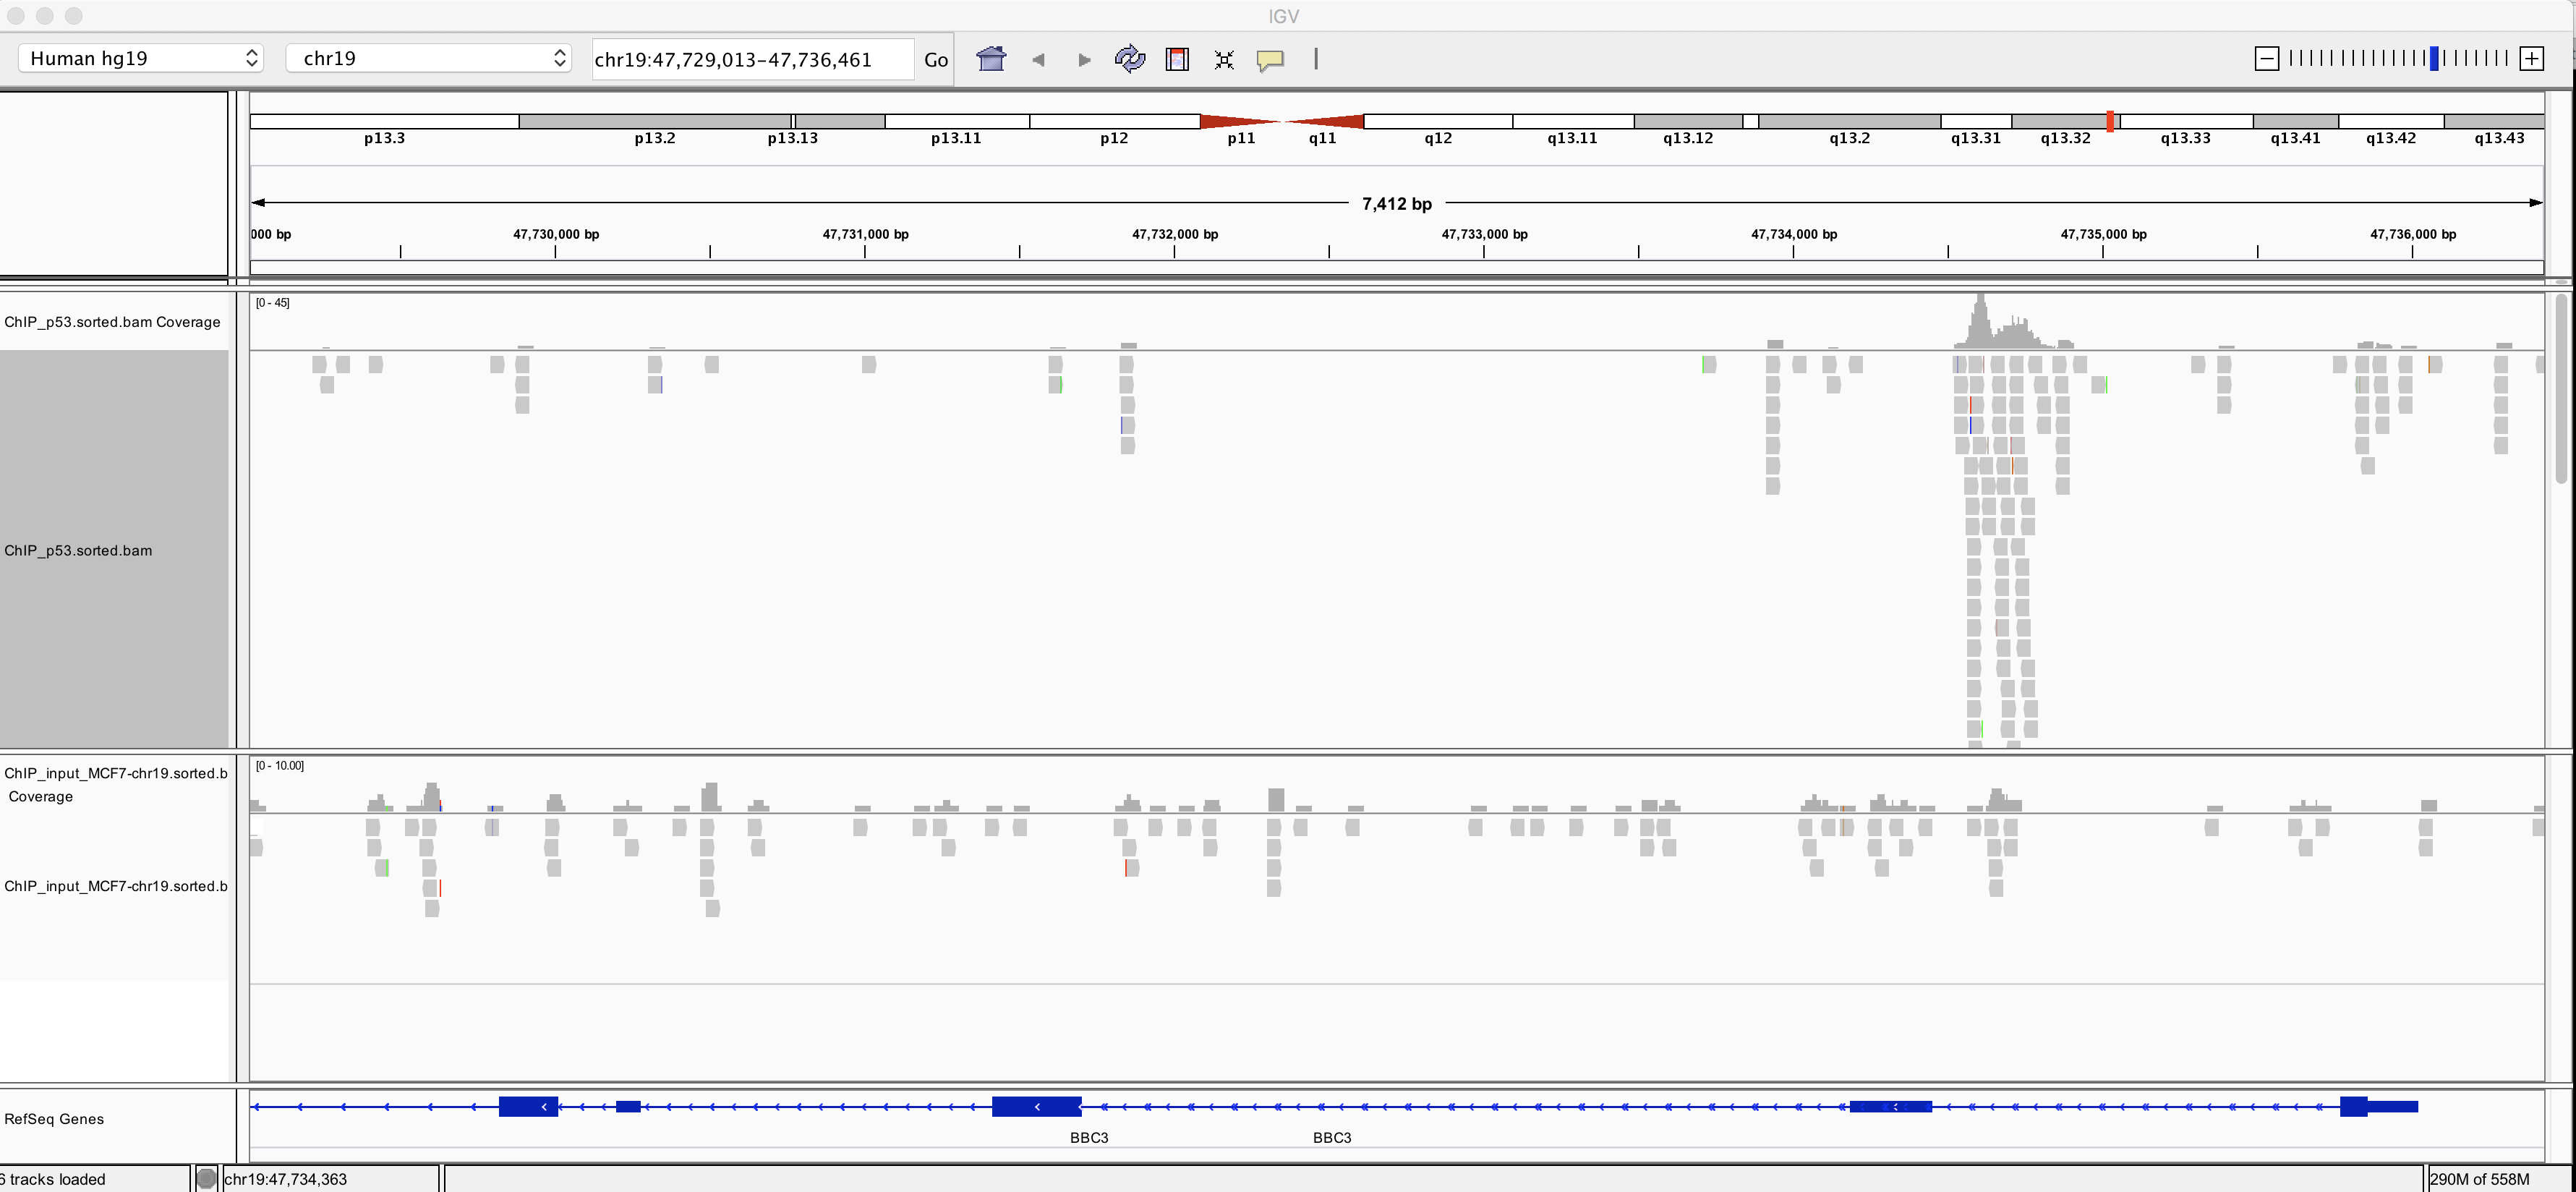

## Genome-wide coverage plots

We will generate a bigwig file that contains only the coverage of the reads, so not the individual reads. This bigWig file is a binary file format (simlar to BAM), and it can be accessed over the internet. This means that you can use the bigWig file locally in IGV, but also as custom track in UCSC (provided that the bigWig is available from a web/ftp server, so you can specific the custom track by entering the URL).

We're using the command bamCoverage from the package deeptools to create a bigwig file that can be used for visualization in IGV or UCSC Genome Browser

The size of chr19 is 59,128,983 bp (you can find that on the UCSC Genome Browser).

In [26]:
# High bin size
bamCoverage -b ChIP_p53.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 59128983 -o p53-chr19_hbs.bw -bs 50

normalization: 1x (effective genome size 59128983)
bamFilesList: ['ChIP_p53.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


In [27]:
# Small bin size (This will take a while)
bamCoverage -b ChIP_p53.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 59128983 -o p53-chr19_sbs.bw -bs 5

normalization: 1x (effective genome size 59128983)
bamFilesList: ['ChIP_p53.sorted.bam']
binLength: 5
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 5
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


Open that .bw file in IGV (=> green track)

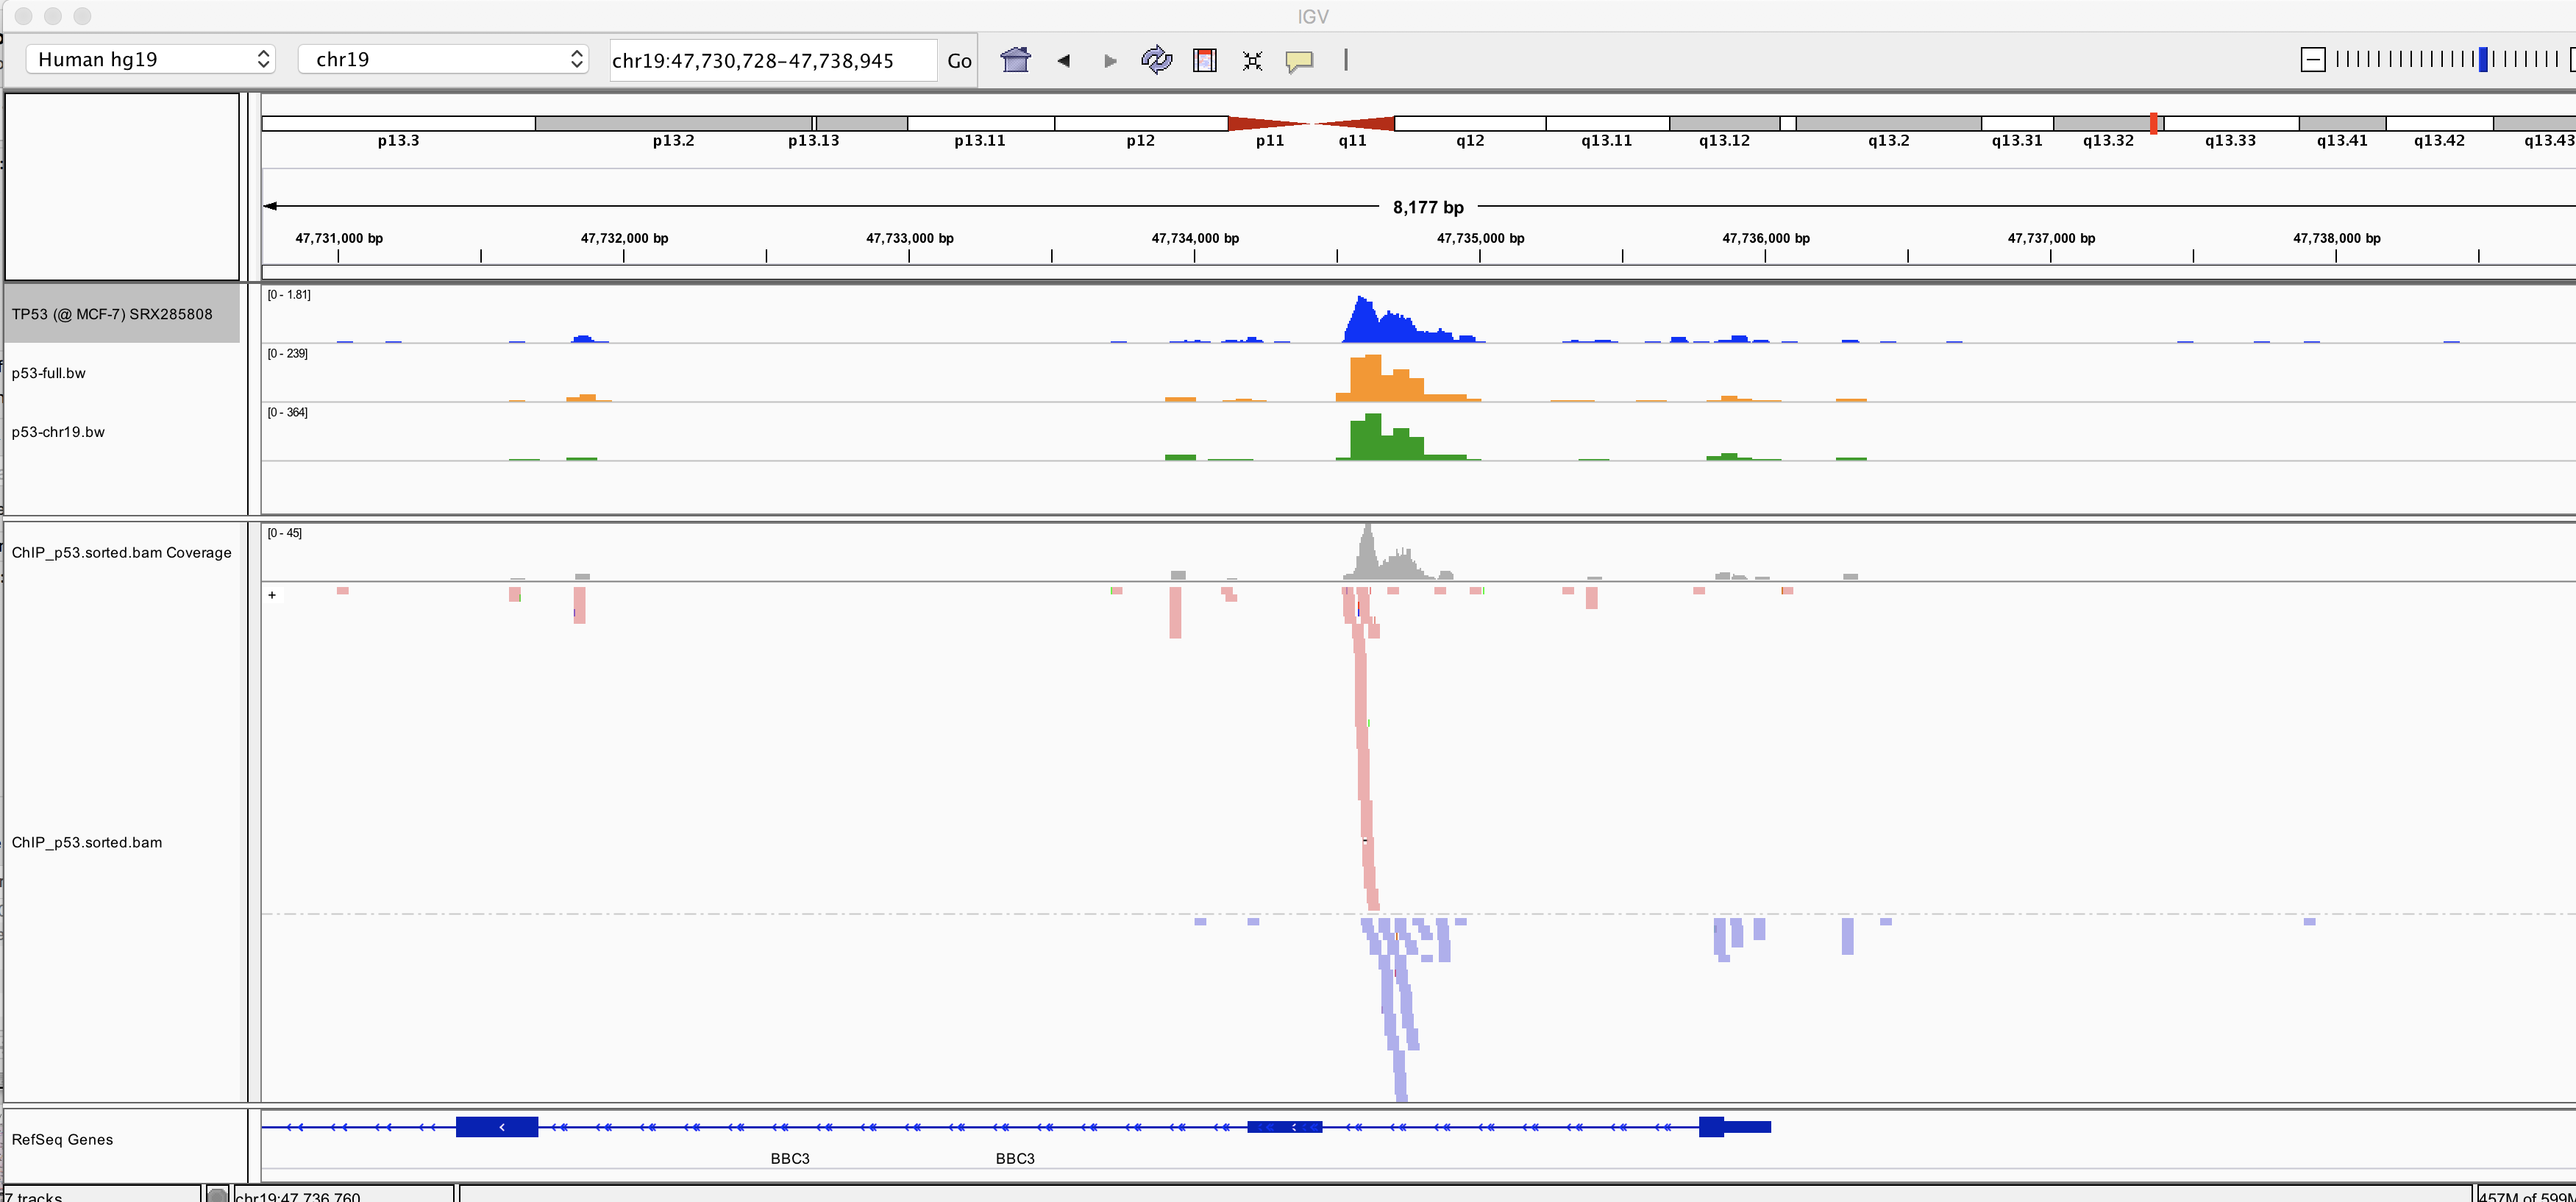

I've also opened the full-genome bigWig file in IGV (orange track), using the File-Load from URL (http://students.aertslab.org/p53-full.bw)

Finally, from the ChIP-atlas page of this data set http://chip-atlas.org/view?id=SRX285808, I have chosen "View on IGV - bigWig", which automatically opens the bigWig file in my local IGV (blue track)


## Peak calling 

Next, we will determine genomic regions with an enrichment of reads, in the form of a "peak". 


* Figure from this article: http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0011471

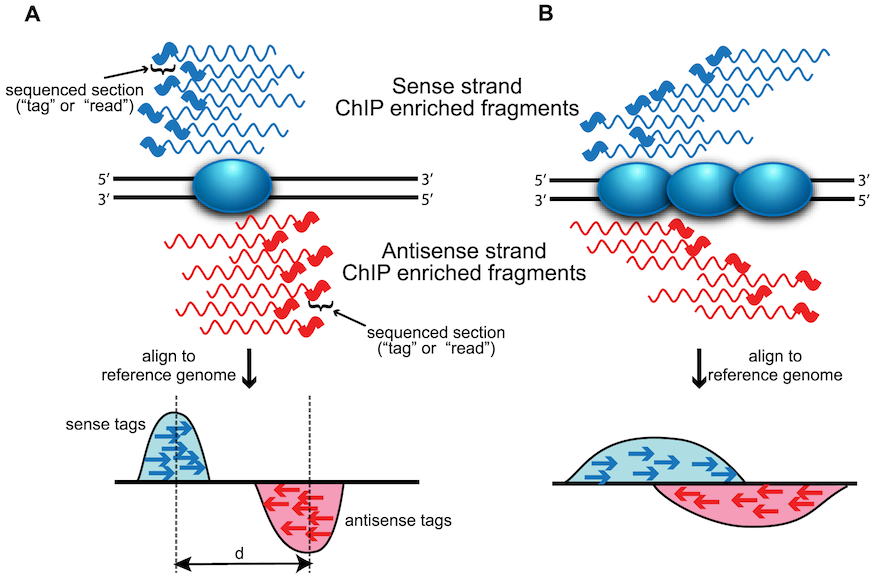

<i>Figure caption from the paper:
Strand-dependent bimodality in tag density.
The 5′ to 3′ sequencing requirement and short read length produce stranded bias in tag distribution. The shaded blue oval represents the protein of interest bound to DNA (solid black lines). Wavy lines represent either sense (blue) or antisense (red) DNA fragments from ChIP enrichment. The thicker portion of the line indicates regions sequenced by short read sequencing technologies. Sequenced tags are aligned to a reference genome and projected onto a chromosomal coordinate (red and blue arrows). (A) Sequence-specific binding events (e.g. transcription factors) are characterized by “punctuate enrichment” and defined strand-dependent bimodality, where the separation between peaks (d) corresponds to the average sequenced fragment length. Panel A was inspired by Jothi et al. (B) Distributed binding events (e.g. histones or RNA polymerase) produce a broader pattern of tag enrichment that results in a less defined bimodal pattern.</i>

If you color the reads by strand (right click in IGV, color alignments by read strand), you will notice the shift between forward and reverse reads.

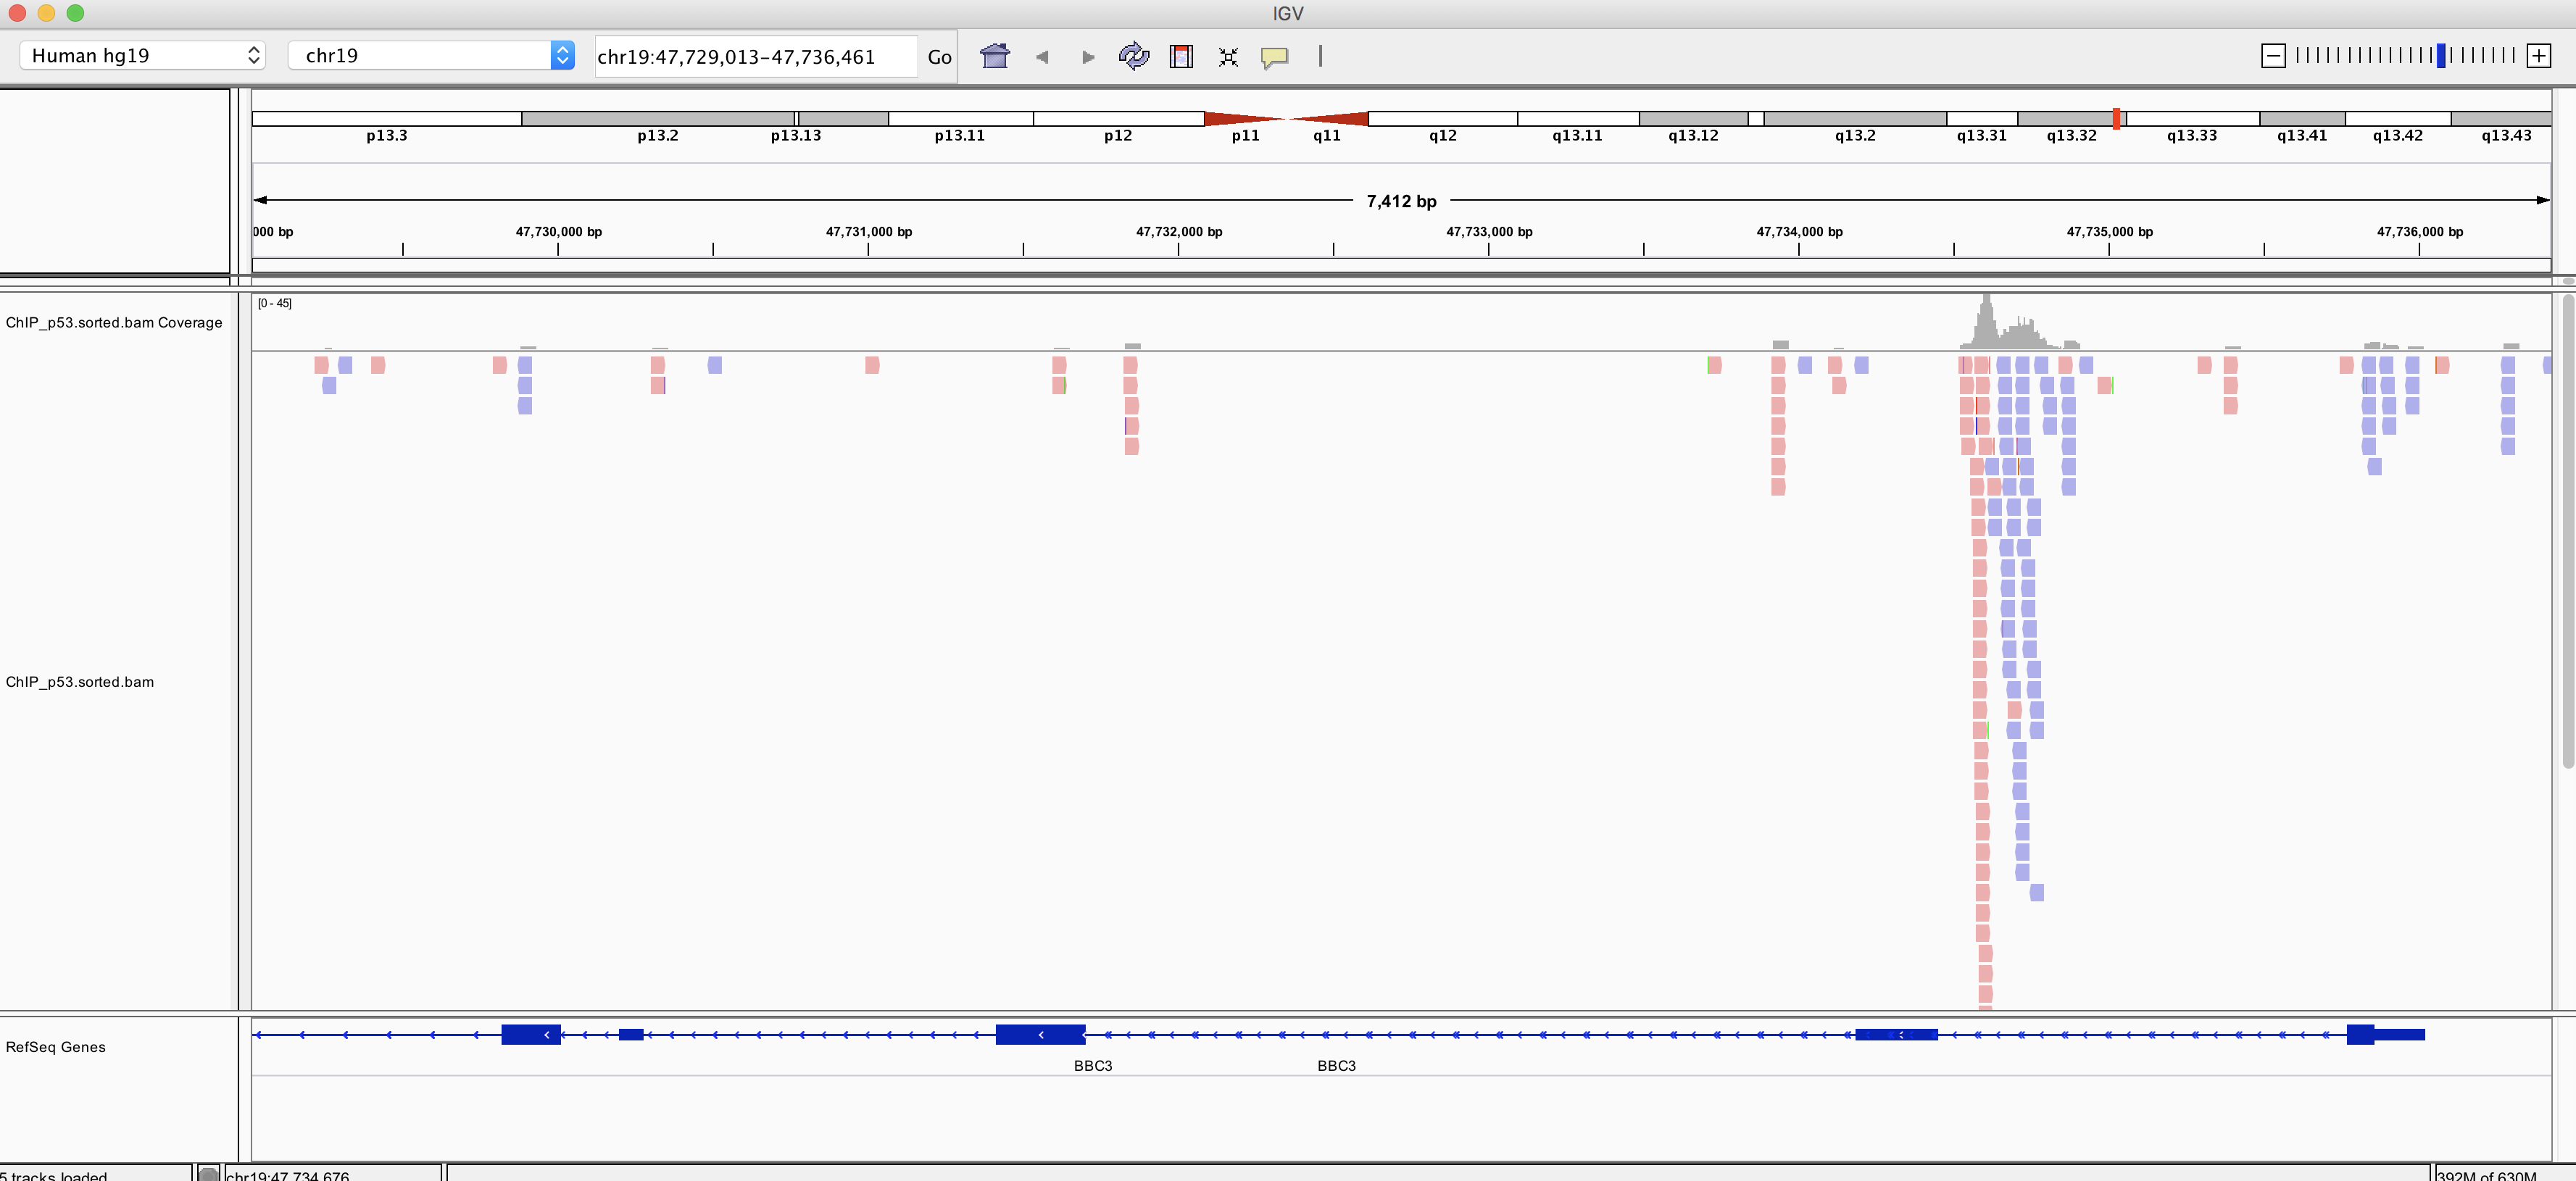

You can also group reads by read strand - here is another example of a target gene, CDKN1A, located on another chromosome, so I'm using the p53-full.bam file. Again we observe the shift in reads between positive and negative strand.

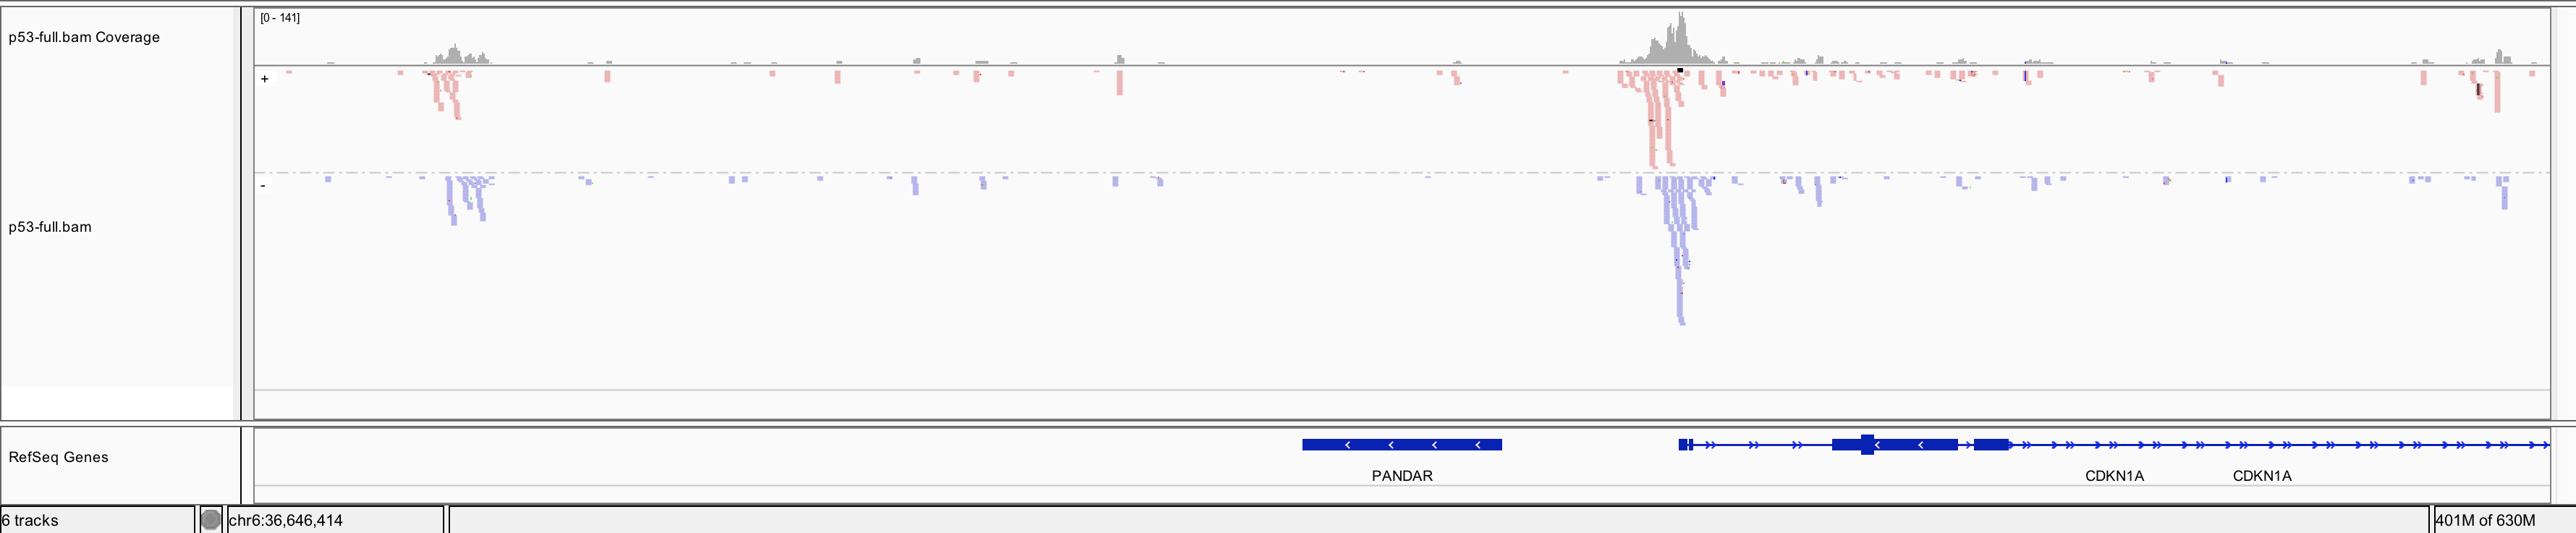

## Peak calling with MACS2

MACS implements a model to take advantage of the strand shift, to distinguish true, bona fide peaks, from artifacts.

In [28]:
macs2 -h

usage: macs2 [-h] [--version]
             {callpeak,bdgpeakcall,bdgbroadcall,bdgcmp,bdgopt,cmbreps,bdgdiff,filterdup,predictd,pileup,randsample,refinepeak}
             ...

macs2 -- Model-based Analysis for ChIP-Sequencing

positional arguments:
  {callpeak,bdgpeakcall,bdgbroadcall,bdgcmp,bdgopt,cmbreps,bdgdiff,filterdup,predictd,pileup,randsample,refinepeak}
    callpeak            Main MACS2 Function: Call peaks from alignment
                        results.
    bdgpeakcall         Call peaks from bedGraph output. Note: All regions on
                        the same chromosome in the bedGraph file should be
                        continuous so only bedGraph files from MACS2 are
                        accpetable.
    bdgbroadcall        Call broad peaks from bedGraph output. Note: All
                        regions on the same chromosome in the bedGraph file
                        should be continuous so only bedGraph files from MACS2
                        are accpetable.
  

The size of chr19 is 59,128,983 bp (you can find that on the UCSC Genome Browser).

In [29]:
macs2 callpeak -t ChIP_p53.sorted.bam -c ChIP_input_MCF7-chr19.sorted.bam -n p53 -g 59128983 -q 0.05

INFO  @ Mon, 14 Oct 2024 22:57:53: 
# Command line: callpeak -t ChIP_p53.sorted.bam -c ChIP_input_MCF7-chr19.sorted.bam -n p53 -g 59128983 -q 0.05
# ARGUMENTS LIST:
# name = p53
# format = AUTO
# ChIP-seq file = ['ChIP_p53.sorted.bam']
# control file = ['ChIP_input_MCF7-chr19.sorted.bam']
# effective genome size = 5.91e+07
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Mon, 14 Oct 2024 22:57:53: #1 read tag files... 
INFO  @ Mon, 14 Oct 2024 22:57:53: #1 read treatment tags... 
INFO  @ Mon, 14 Oct 2024 22:57:53: Detected format is: BAM 
INFO  @ Mon, 14 Oct 2024 22:57:53: * Input file is gzipped. 
INFO  @ Mon, 14 Oct 

In [30]:
ls -lt | head -5

total 62176
-rw-r--r-- 1 u0160030 domain users     1477 Oct 14 22:58 p53_peaks.narrowPeak
-rw-r--r-- 1 u0160030 domain users     2954 Oct 14 22:58 p53_peaks.xls
-rw-r--r-- 1 u0160030 domain users      915 Oct 14 22:58 p53_summits.bed
-rw-r--r-- 1 u0160030 domain users    99132 Oct 14 22:57 p53_model.r


macs2 produces the following 4 files:

* `p53_peaks.xls`: is a tabular file which contains information about called peaks. You can open it in excel and sort/filter using excel functions. Information include position, length and height of detected peak etc.
* `p53_peaks.narrowPeak`: is BED6+4 format file which contains the peak locations together with peak summit, p-value and q-value. You can load it directly to IGV or UCSC genome browser.
* `p53_summits.bed`: is in BED format, which contains the peak summits locations for every peaks. The 5th column in this file is -log10p-value the same as NAME_peaks.bed. If you want to find the motifs at the binding sites, this file is recommended. The file can be loaded directly to UCSC genome browser. But remember to remove the beginning track line if you want to analyze it by other tools.
* `p53_model.r`: is an R script which you can use to produce a PDF image about the model based on your data. Load it to R by: `$ Rscript NAME_model.r` Then a pdf file NAME_model.pdf will be generated in your current directory. Note, R is required to draw this figure.

In [70]:
cat p53_peaks.narrowPeak | wc -l

21


Copy the `p53_peaks.narrowPeak` file to your computer, and open it in IGV. Now you can see the called peak in the BBC3 intron.

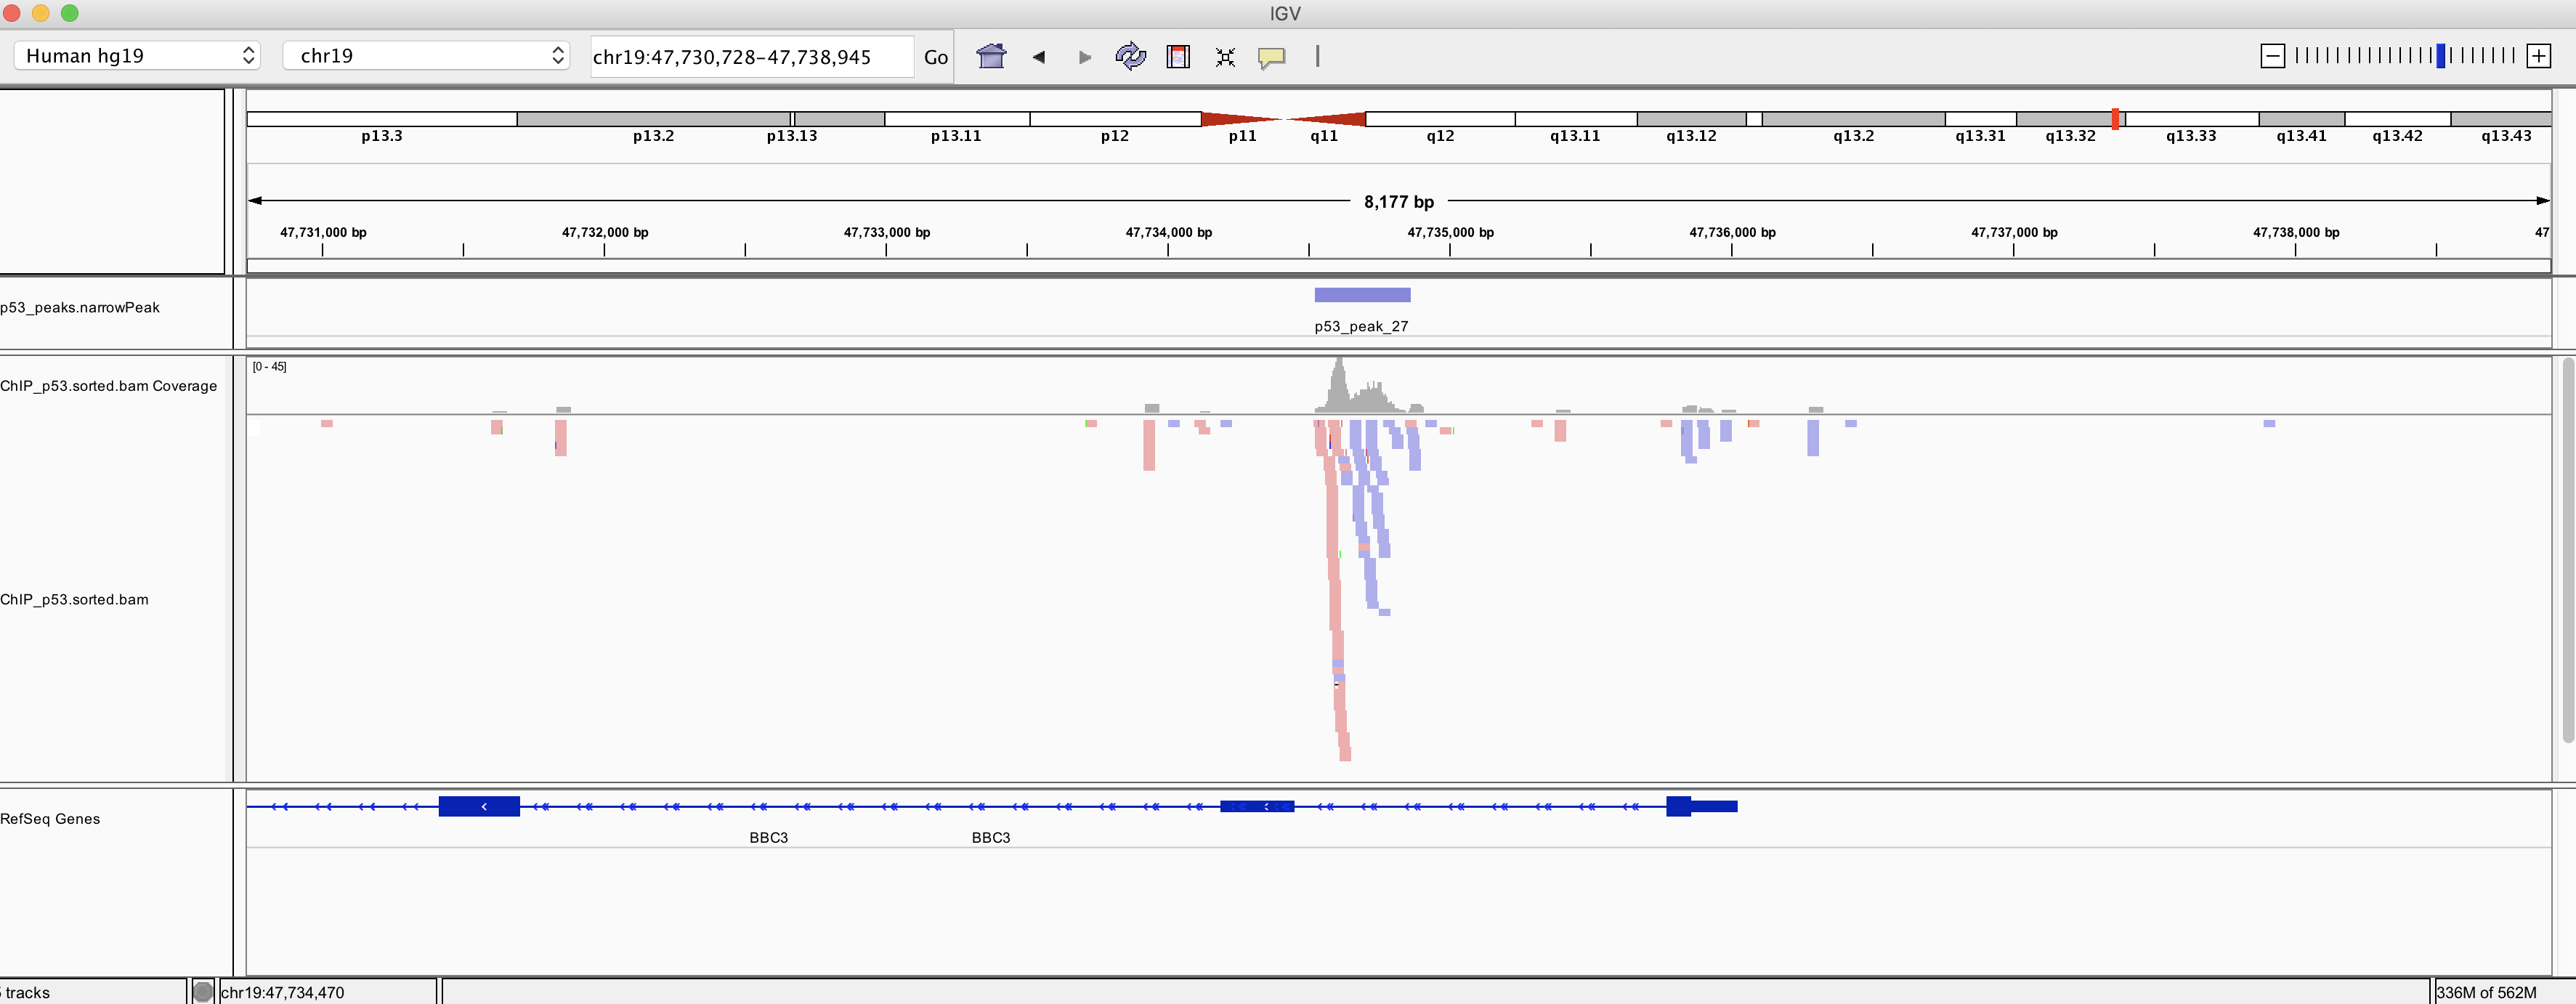

## Genome-wide ChIP-seq peaks

For the genome-wide analysis, you can run macs2 callpeak on the full BAM file (`p53-nutlin.bam`) with the full genome input file (`input.bam`).

We have already done this. The resulting .narrowPeak file is here: ...

In [ ]:
# macs2 callpeak -t /mnt/storage/data/chipseq/p53/p53-nutlin.bam -c /mnt/storage/data/chipseq/p53/input.bam -n p53-full -g hs -q 0.05

In [31]:
# cd ~/data/jupyternotebooks/chipseq
ln -sf /mnt/storage/data/chipseq/p53/p53-full.bw .
ln -sf /mnt/storage/data/chipseq/p53/p53-full_peaks.narrowPeak .

deeptools has a couple of commands to visualize the ChIP-seq data, see here for some examples: http://deeptools.readthedocs.io/en/latest/content/example_gallery.html

below we are going to plot a heatmap of all TSS in the human genome, showing the coverage of the p53 ChIP-seq data, to see whether there is an enrichment in 2kb around the TSS

In [32]:
cat p53-full_peaks.narrowPeak | wc -l

657


You can even get the top regions (for the following motif discovery) if you have too many

In [33]:
cat p53-full_peaks.narrowPeak | sort -k9 -g -r | head -1000

chr1	181103866	181104699	p53-full_peak_33	4533	.	56.55639	461.74197	453.36530	400
chr9	139001425	139001953	p53-full_peak_637	1757	.	24.48210	182.67610	175.70268	249
chr11	47236257	47236947	p53-full_peak_94	1677	.	37.62248	174.66087	167.76904	269
chr6	36643867	36644528	p53-full_peak_497	1559	.	45.82577	162.71597	155.92778	288
chr15	63449181	63449767	p53-full_peak_192	1557	.	22.52353	162.54640	155.75993	273
chr15	89164297	89164820	p53-full_peak_200	1365	.	21.96456	143.04965	136.50005	238
chr8	29627811	29628359	p53-full_peak_578	1348	.	35.41727	141.34909	134.81750	320
chr2	1492552	1493251	p53-full_peak_302	1311	.	33.53891	137.66827	131.19719	413
chr17	67603206	67603885	p53-full_peak_252	1184	.	41.34285	124.75544	118.40877	242
chr1	201437771	201438530	p53-full_peak_39	1182	.	17.62182	124.62420	118.27970	510
chr12	69202510	69202936	p53-full_peak_131	1070	.	33.50387	113.24173	107.00614	190
chr9	124084563	124085122	p53-full_peak_631	1064	.	29.84233	112.65395	106.42124	245
chr2	171078114	17107

Cut the first three columns to make a BED file

In [34]:
cat p53-full_peaks.narrowPeak | cut -f 1-3 > p53-full_peaks.bed

In [35]:
computeMatrix reference-point \
    -S p53-full.bw \
    -R p53-full_peaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out p53-full.tab.gz

In [37]:
plotHeatmap \
    -m p53-full.tab.gz \
    -out p53-peaks.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

![](chipseq/p53-peaks.png)

There is a difference in the peak height among all the peaks!

# Histone ChIP-seq

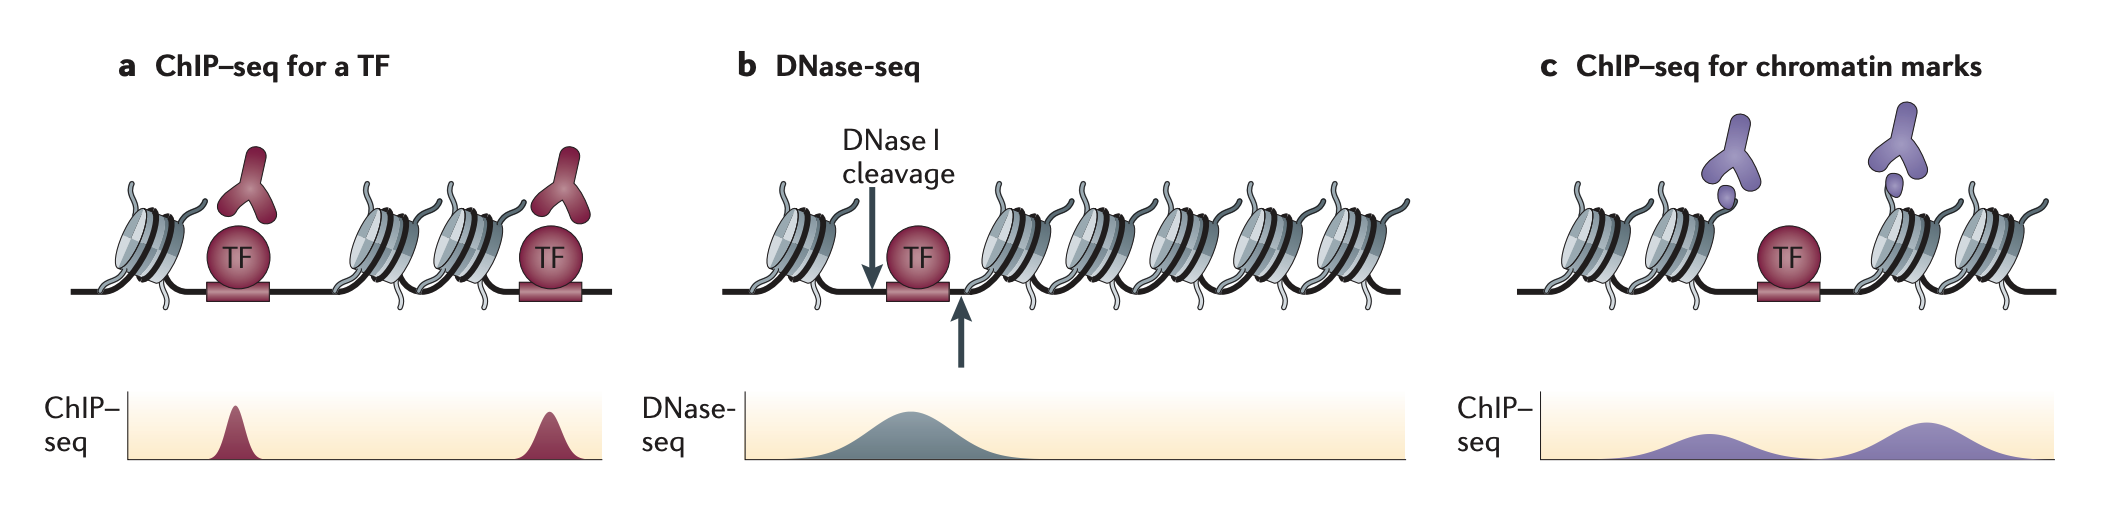

We will analyse Histone ChIP-seq (H3K27Ac) data, related to TP53 activation.

The following publicly available record at GEO contains several epigenomic data sets related to TP53 activation. The treatment is similar to our previous case study, using nutlin-3a. However, here they used IMR90 normal cells, compared to our MCF-7 breast cancer cells we used previously.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE58740

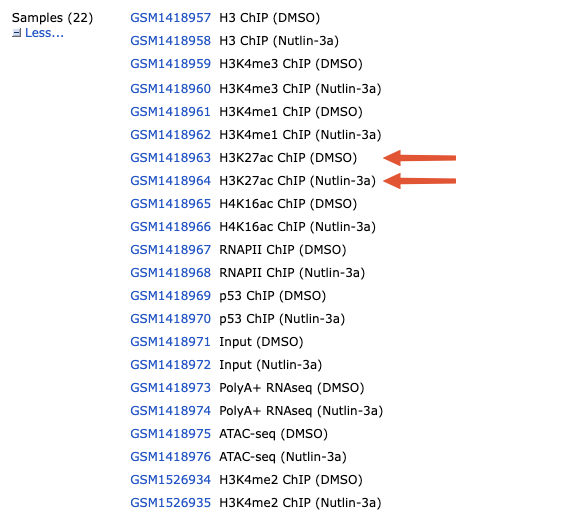

Downloaded bigWig files can be opened in IGV. You can also use the ftp link (see below) to load from URL in IGV.

Note: if the data is available on chip-atlas.org, you can also view the bigWig directly in IGV without downloading; use the View in IGV option on the chip-atlas.org webpage.

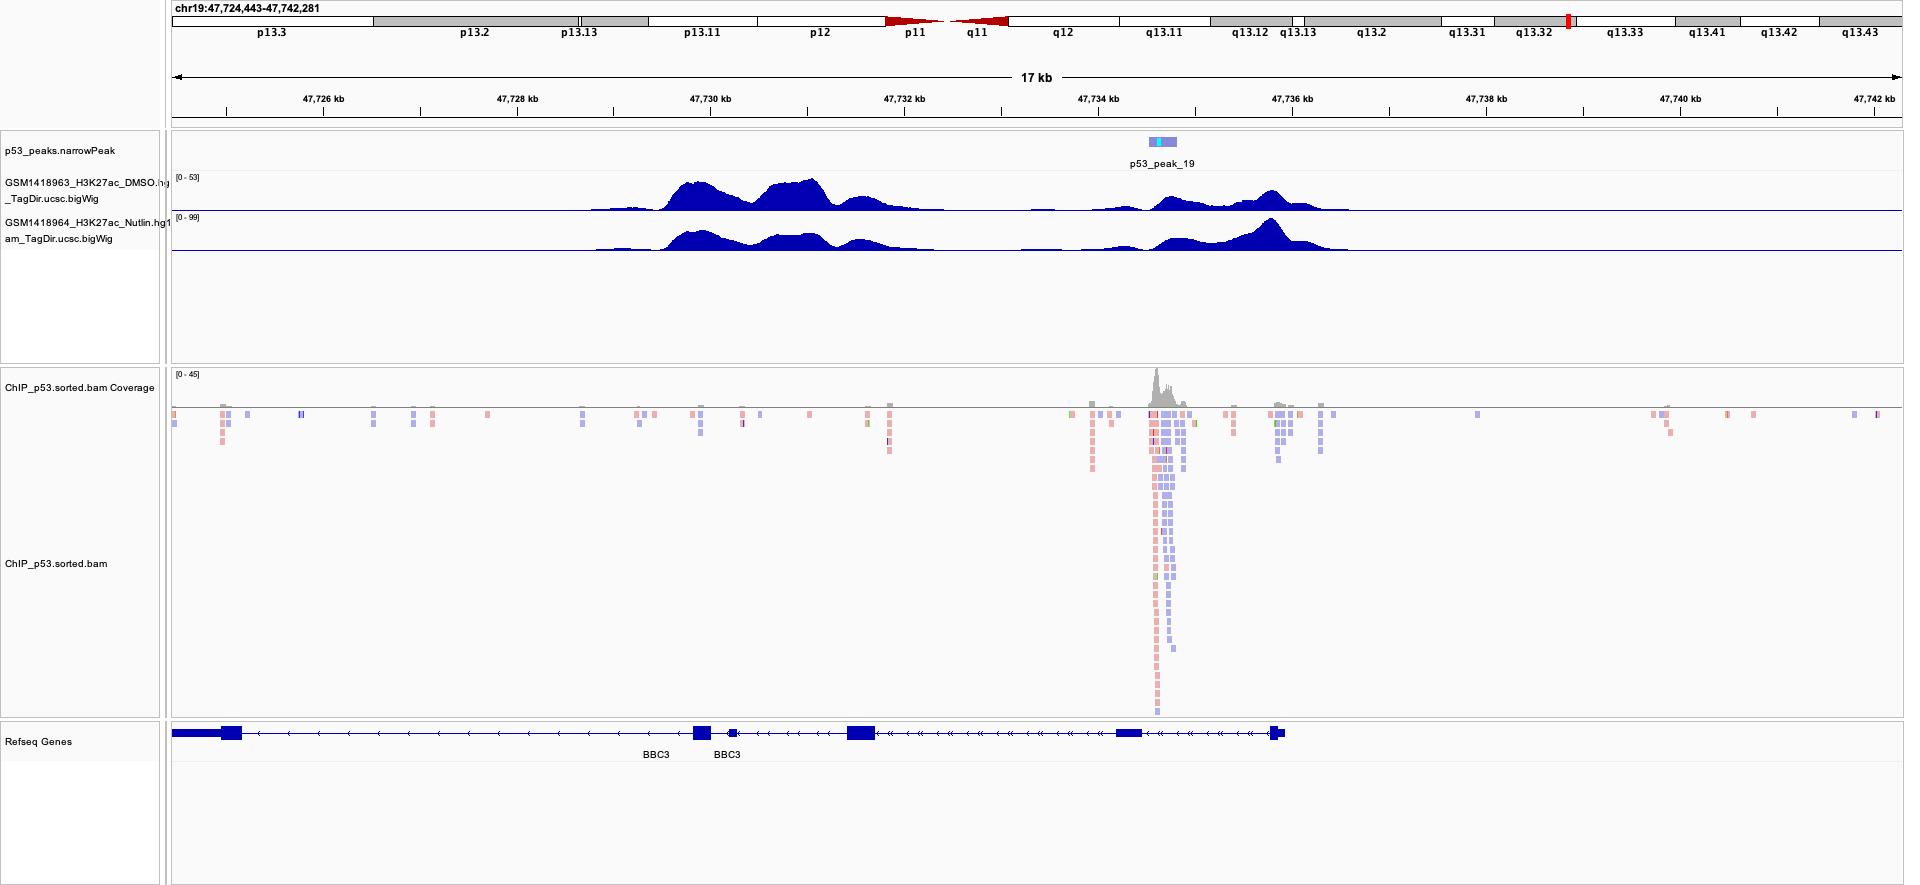

The peak near BBC3 does not show obvious changes in H3K27Ac between DMSO-treated versus nutlin-treated IMR90 cells.

However, the tracks are autoscaled, and when we zoom out, we do see a small increase in H3K27Ac after nutlin-3a.

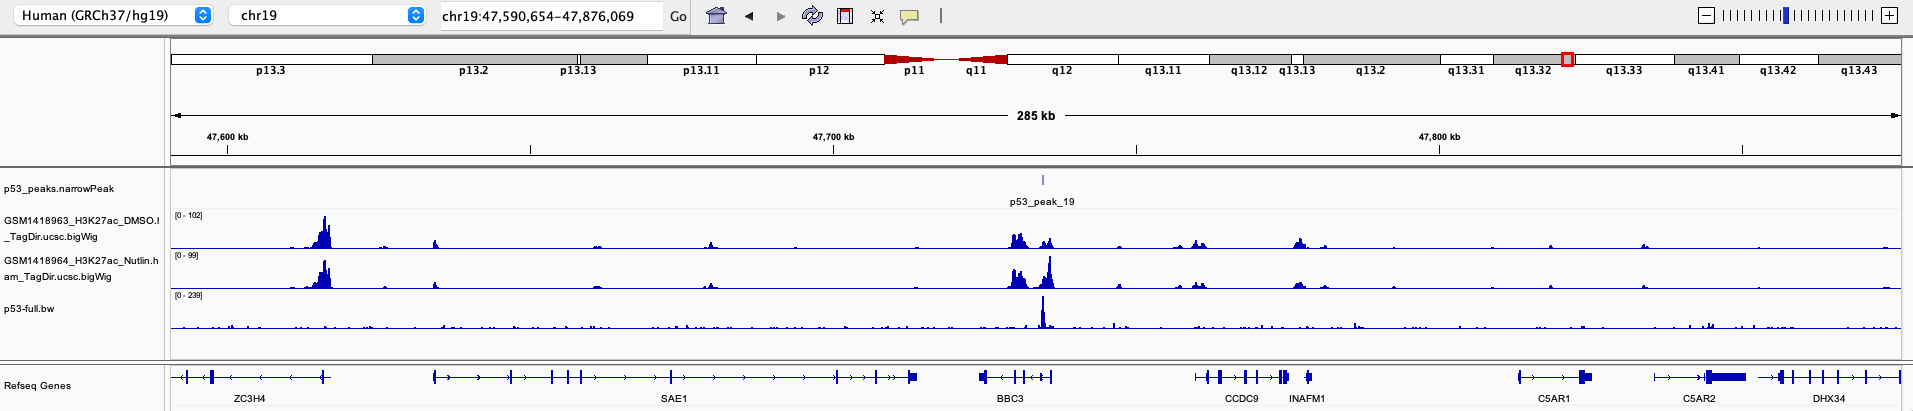

To view the data in the UCSC Genome Browser, you can make custom tracks with the bigWig files. This only works if the bigWig files are available from a URL. For this dataset, they have made the bigWig files available at GEO. Copy the URL of the FTP link (this can be used for IGV too).

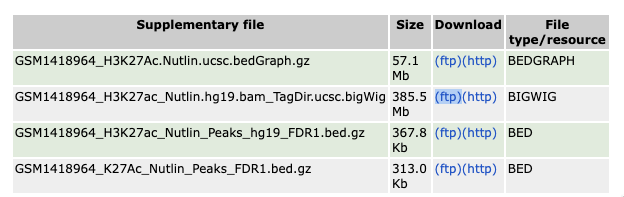

Simply paste that URL in the custom track box

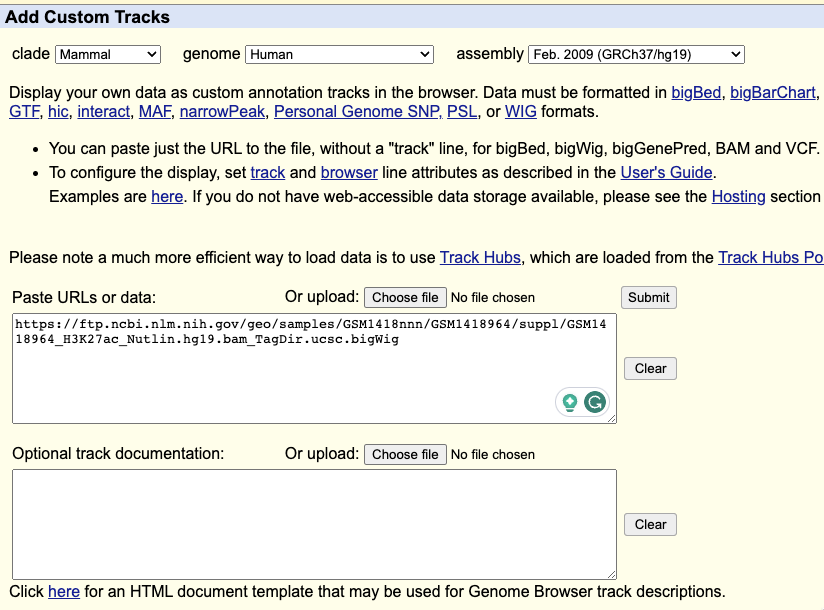

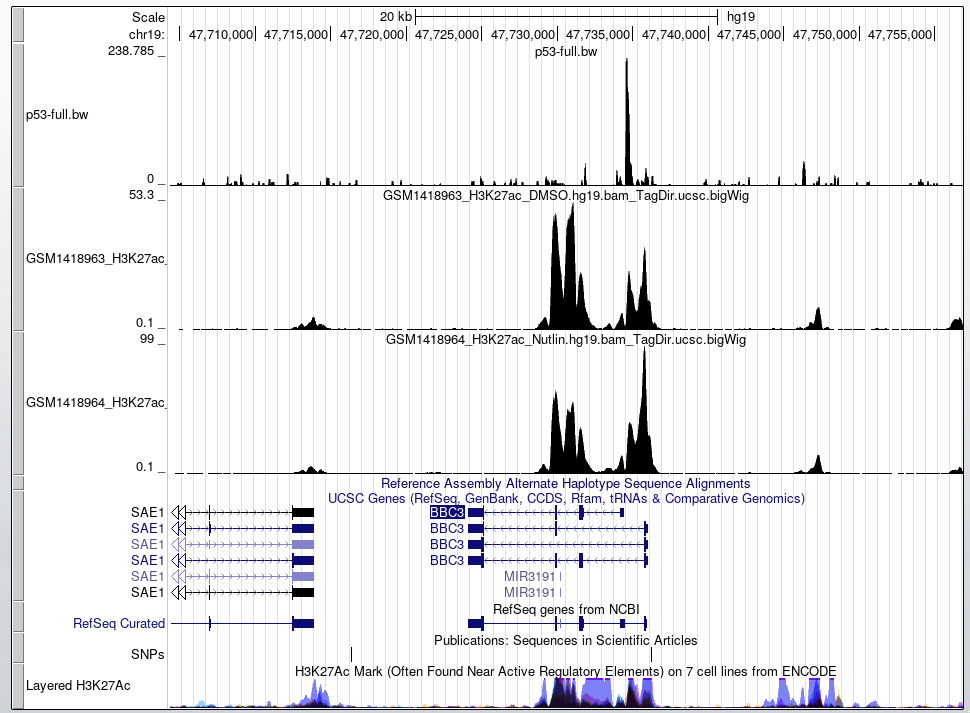

The tracks contain our TF ChIP-seq data from the previous session (in MCF-7 cells after nutlin-3a treatment) and the H3K27ac ChIP-seq data in IMR90 cells after DMSO or nutlin-3a treatment.

## Visualize H3K27Ac ChIP-seq data on the TP53 ChIP-seq peaks

After downloading the bigWig files (you don't have to do this for this exercise, we already downloaded them)

In [41]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/histone_chipseq/
cd /mnt/storage/$USER/jupyternotebooks/histone_chipseq/

Creat a symbolic link to the bigWig files on the server

In [42]:
ln -sf /mnt/storage/data/chipseq/chromatin/*.bigWig .

In [43]:
ls -lt *.bigWig

lrwxrwxrwx 1 u0160030 domain users 87 Oct 14 23:40 GSM1418963_H3K27ac_DMSO.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418963_H3K27ac_DMSO.hg19.bam_TagDir.ucsc.bigWig
lrwxrwxrwx 1 u0160030 domain users 89 Oct 14 23:40 GSM1418964_H3K27ac_Nutlin.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418964_H3K27ac_Nutlin.hg19.bam_TagDir.ucsc.bigWig
lrwxrwxrwx 1 u0160030 domain users 84 Oct 14 23:40 GSM1418975_ATAC_DMSO.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418975_ATAC_DMSO.hg19.bam_TagDir.ucsc.bigWig
lrwxrwxrwx 1 u0160030 domain users 86 Oct 14 23:40 GSM1418976_ATAC_Nutlin.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418976_ATAC_Nutlin.hg19.bam_TagDir.ucsc.bigWig


Also create a link to the p53_peaks.narrowPeak, which contains all p53 peaks (from the entire genome; we have created this using macs2 callpeak)

In [44]:
ls -lt /mnt/storage/data/chipseq/p53/*.narrowPeak

-rw-r--r-- 1 u0079808 teachers 50433 Sep 25  2019 /mnt/storage/data/chipseq/p53/p53-full_peaks.narrowPeak
-rw-rw-r-- 1 u0079808 teachers  3224 Oct 20  2015 /mnt/storage/data/chipseq/p53/test_peaks.narrowPeak


In [45]:
ln -sf /mnt/storage/data/chipseq/p53/p53-full_peaks.narrowPeak .

In [46]:
wc -l p53-full_peaks.narrowPeak

657 p53-full_peaks.narrowPeak


Create a BED file from the narrowpeak file:

In [47]:
cat p53-full_peaks.narrowPeak | cut -f 1-3 | head

chr1	8925386	8925636
chr1	9241975	9242475
chr1	12267182	12267459
chr1	23919094	23919386
chr1	24020156	24020406
chr1	29565827	29566077
chr1	40538858	40539110
chr1	41947946	41948333
chr1	42998891	42999259
chr1	45265364	45265888
cut: write error: Broken pipe


In [48]:
cat p53-full_peaks.narrowPeak | cut -f 1-3 > p53-all_peaks.bed

We will use the deeptools commands to generate a heatmap, see here for more info: https://deeptools.readthedocs.io/en/develop/content/tools/plotHeatmap.html

In [49]:
computeMatrix scale-regions \
    -S GSM1418963_H3K27ac_DMSO.hg19.bam_TagDir.ucsc.bigWig GSM1418964_H3K27ac_Nutlin.hg19.bam_TagDir.ucsc.bigWig \
    -R p53-all_peaks.bed \
    -a 2000 \
    -b 2000 \
    -out p53-peaks-H3K27Ac.tab.gz

In [50]:
plotHeatmap \
    -m p53-peaks-H3K27Ac.tab.gz \
    -out p53-peaks-H3K27Ac.png \
    --heatmapHeight 15 \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --samplesLabel H3K27ac_DMSO H3K27ac_Nutlin \
    --plotTitle 'ChIP-seq H3K27Ac signal'

In [51]:
ls -lt *.png

-rw-r--r-- 1 u0160030 domain users 299930 Oct 14 23:41 p53-peaks-H3K27Ac.png


We observe an increase in H3K27Ac on the TP53 ChIP-seq peaks, after treating with nutlin-3a, indicating that these regions become active enhancers (because TP53 now binds there and activates target genes).

Note that many regions have no H3K27Ac signal !

![p53-peaks-H3k27ac](histone_chipseq/p53-peaks-H3K27Ac.png)

## Find differential H3K27Ac signal, genome-wide

https://github.com/taoliu/MACS/wiki/Call-differential-binding-events

For differential activity, we need the BAM files. In your project, this requires downloading the FASTQ data from SRA, and aligning the reads to the genome, for example using Bowtie.

You can find the SRR accession number by following the link to SRA from the GEO page.

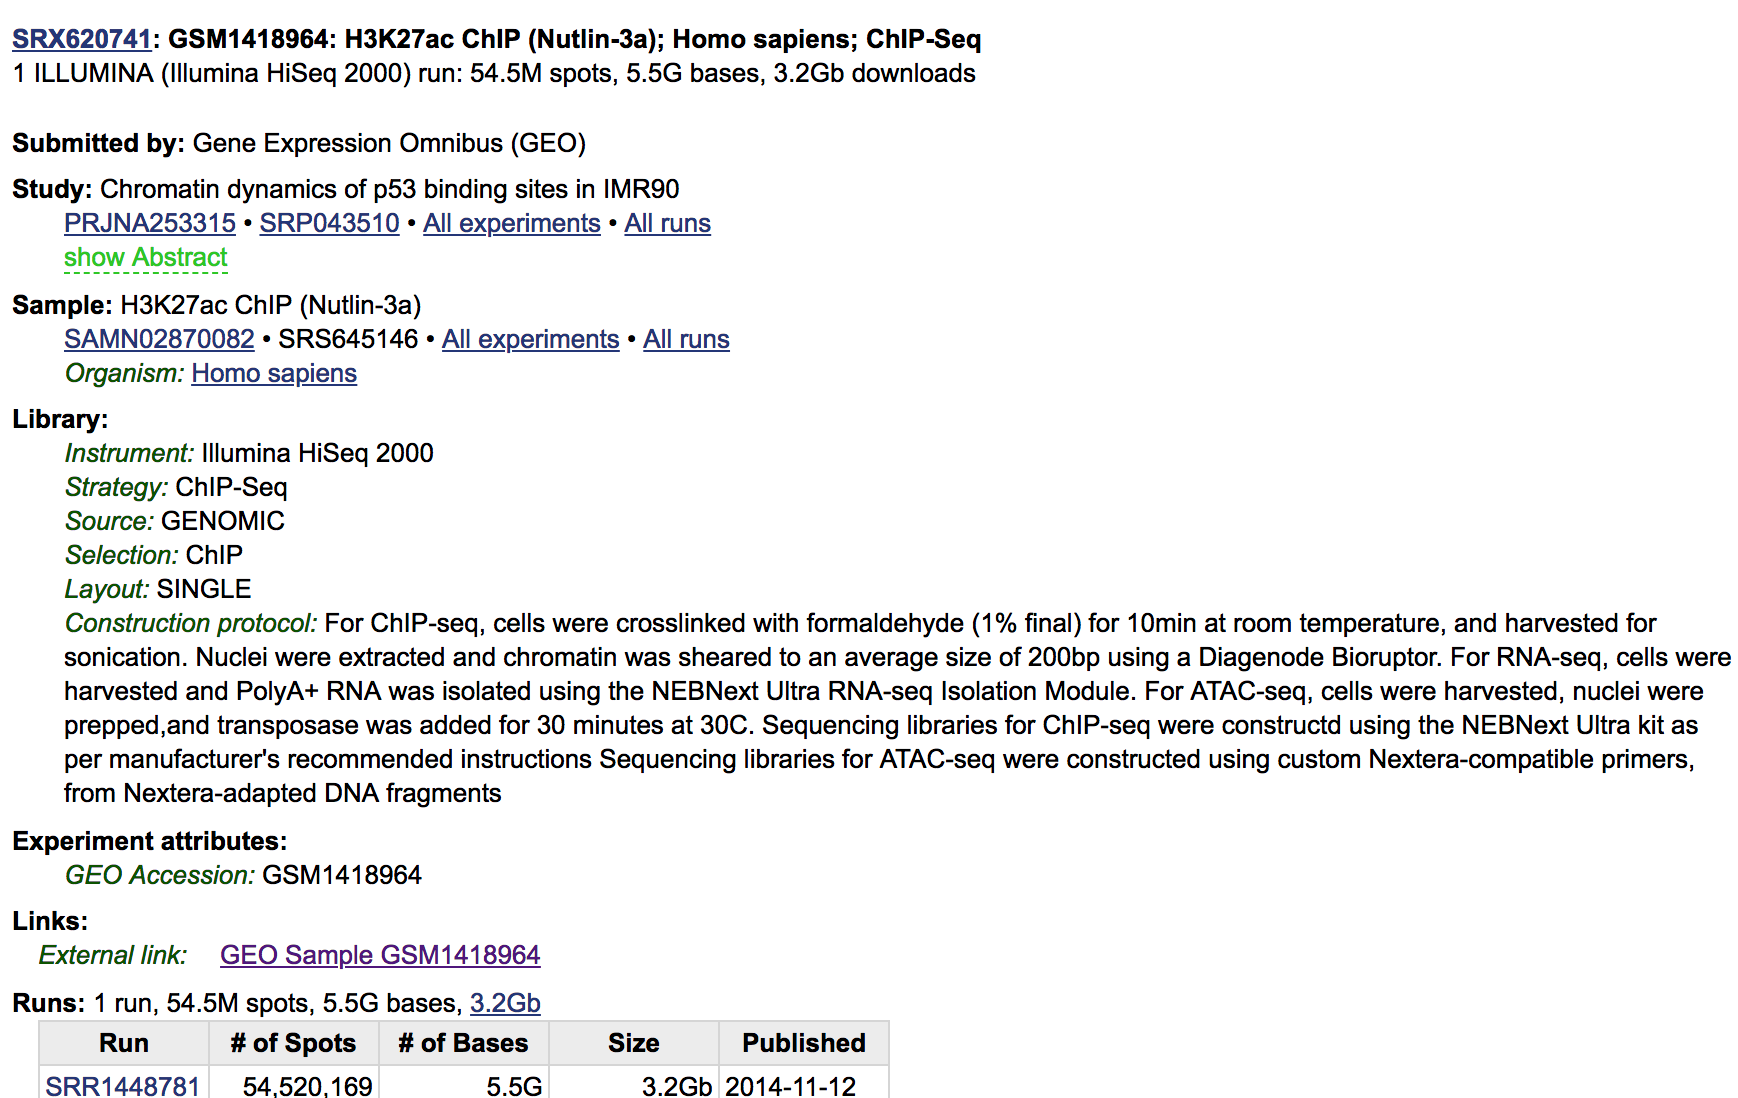

Download fastq and align using bowtie

In [17]:
# fastq-dump -O /mnt/storage/data/chipseq/chromatin/ SRR1448781

In [18]:
# bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 /mnt/storage/data/chipseq/chromatin/SRR1448781.fastq -S ChIP_H3K27Ac_Nutlin.sam

Mapping with the minimap algorithm goes much faster than bowtie


In [19]:
# minimap2 -a -x sr /mnt/storage/data/resources/hg19/hg19.fa SRR1448781.fastq.gz > SRR1448781.sam

We will use only the reads that map to chr19 for this exercise

In [52]:
ln -sf /mnt/storage/data/chipseq/chromatin/H3k27ac/*chr19*.bam .

In [53]:
ls -lt *chr19*.bam

lrwxrwxrwx 1 u0160030 domain users 97 Oct 14 23:42 ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.minimap2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.minimap2.bam
lrwxrwxrwx 1 u0160030 domain users 90 Oct 14 23:42 ChIP_Input__DMSO__SRR1448788.chr19.bowtie2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_Input__DMSO__SRR1448788.chr19.bowtie2.bam
lrwxrwxrwx 1 u0160030 domain users 91 Oct 14 23:42 ChIP_Input__DMSO__SRR1448788.chr19.minimap2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_Input__DMSO__SRR1448788.chr19.minimap2.bam
lrwxrwxrwx 1 u0160030 domain users 94 Oct 14 23:42 ChIP_Input__Nutlin3a__SRR1448789.chr19.bowtie2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_Input__Nutlin3a__SRR1448789.chr19.bowtie2.bam
lrwxrwxrwx 1 u0160030 domain users 95 Oct 14 23:42 ChIP_Input__Nutlin3a__SRR1448789.chr19.minimap2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_Input__Nutlin3a__SRR1448789.chr19.minimap2.bam
lrwxrw

Predict fragment length for each BAM file (so we can extend at the same degree)

In [54]:
macs2 predictd -i ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam

INFO  @ Mon, 14 Oct 2024 23:43:12: # read alignment files... 
INFO  @ Mon, 14 Oct 2024 23:43:12: # read treatment tags... 
INFO  @ Mon, 14 Oct 2024 23:43:12: Detected format is: BAM 
INFO  @ Mon, 14 Oct 2024 23:43:12: * Input file is gzipped. 
INFO  @ Mon, 14 Oct 2024 23:43:17:  1000000 
INFO  @ Mon, 14 Oct 2024 23:43:20: tag size is determined as 100 bps 
INFO  @ Mon, 14 Oct 2024 23:43:20: # tag size = 100 
INFO  @ Mon, 14 Oct 2024 23:43:20: # total tags in alignment file: 1582027 
INFO  @ Mon, 14 Oct 2024 23:43:20: # Build Peak Model... 
INFO  @ Mon, 14 Oct 2024 23:43:20: #2 looking for paired plus/minus strand peaks... 
INFO  @ Mon, 14 Oct 2024 23:43:22: #2 number of paired peaks: 23995 
INFO  @ Mon, 14 Oct 2024 23:43:22: start model_add_line... 
INFO  @ Mon, 14 Oct 2024 23:43:22: start X-correlation... 
INFO  @ Mon, 14 Oct 2024 23:43:22: end of X-cor 
INFO  @ Mon, 14 Oct 2024 23:43:22: # finished! 
INFO  @ Mon, 14 Oct 2024 23:43:22: # predicted fragment length is 297 bps 
INFO  @ M

In [55]:
macs2 predictd -i ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam

INFO  @ Mon, 14 Oct 2024 23:43:22: # read alignment files... 
INFO  @ Mon, 14 Oct 2024 23:43:22: # read treatment tags... 
INFO  @ Mon, 14 Oct 2024 23:43:22: Detected format is: BAM 
INFO  @ Mon, 14 Oct 2024 23:43:22: * Input file is gzipped. 
INFO  @ Mon, 14 Oct 2024 23:43:28:  1000000 
INFO  @ Mon, 14 Oct 2024 23:43:31: tag size is determined as 100 bps 
INFO  @ Mon, 14 Oct 2024 23:43:31: # tag size = 100 
INFO  @ Mon, 14 Oct 2024 23:43:31: # total tags in alignment file: 1602586 
INFO  @ Mon, 14 Oct 2024 23:43:31: # Build Peak Model... 
INFO  @ Mon, 14 Oct 2024 23:43:31: #2 looking for paired plus/minus strand peaks... 
INFO  @ Mon, 14 Oct 2024 23:43:33: #2 number of paired peaks: 21977 
INFO  @ Mon, 14 Oct 2024 23:43:33: start model_add_line... 
INFO  @ Mon, 14 Oct 2024 23:43:33: start X-correlation... 
INFO  @ Mon, 14 Oct 2024 23:43:33: end of X-cor 
INFO  @ Mon, 14 Oct 2024 23:43:33: # finished! 
INFO  @ Mon, 14 Oct 2024 23:43:33: # predicted fragment length is 296 bps 
INFO  @ M

Predicted fragment sizes are 297bp and 296bp. Now we can create the needed BedGraph files using macs2 callpeak -B and extsize ~ fragment length.

The following commands will take ~ 10 minutes to run.

In [56]:
macs2 callpeak -B -t ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam -n nutlin --nomodel --extsize 300

INFO  @ Mon, 14 Oct 2024 23:43:33: 
# Command line: callpeak -B -t ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam -n nutlin --nomodel --extsize 300
# ARGUMENTS LIST:
# name = nutlin
# format = AUTO
# ChIP-seq file = ['ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Mon, 14 Oct 2024 23:43:33: #1 read tag files... 
INFO  @ Mon, 14 Oct 2024 23:43:33: #1 read treatment tags... 
INFO  @ Mon, 14 Oct 2024 23:43:33: Detected format is: BAM 
INFO  @ Mon, 14 Oct 2024 23:43:33: * Input file is gzipped. 
INFO  @ Mon, 14 Oct 20

In [57]:
macs2 callpeak -B -t ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam -n DMSO --nomodel --extsize 300

INFO  @ Mon, 14 Oct 2024 23:50:24: 
# Command line: callpeak -B -t ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam -n DMSO --nomodel --extsize 300
# ARGUMENTS LIST:
# name = DMSO
# format = AUTO
# ChIP-seq file = ['ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Mon, 14 Oct 2024 23:50:24: #1 read tag files... 
INFO  @ Mon, 14 Oct 2024 23:50:24: #1 read treatment tags... 
INFO  @ Mon, 14 Oct 2024 23:50:24: Detected format is: BAM 
INFO  @ Mon, 14 Oct 2024 23:50:24: * Input file is gzipped. 
INFO  @ Mon, 14 Oct 2024 23:50:30:

Find the number of reads after filtering which will be needed for the bdgdiff command. They are also printed in the runtime message of the command.

In [58]:
egrep "tags after filtering in treatment|tags after filtering in control" nutlin_peaks.xls

# tags after filtering in treatment: 1193531


In [59]:
egrep "tags after filtering in treatment|tags after filtering in control" DMSO_peaks.xls

# tags after filtering in treatment: 1187185


Inspect the bdg files

In [60]:
ls -lt *.bdg

-rw-r--r-- 1 u0160030 domain users 67240459 Oct 14 23:57 DMSO_control_lambda.bdg
-rw-r--r-- 1 u0160030 domain users 56524561 Oct 14 23:57 DMSO_treat_pileup.bdg
-rw-r--r-- 1 u0160030 domain users 68106938 Oct 14 23:50 nutlin_control_lambda.bdg
-rw-r--r-- 1 u0160030 domain users 58239596 Oct 14 23:50 nutlin_treat_pileup.bdg


Perform the differential analysis

In [61]:
macs2 bdgdiff \
    --t1 nutlin_treat_pileup.bdg \
    --c1 nutlin_control_lambda.bdg \
    --t2 DMSO_treat_pileup.bdg \
    --c2 DMSO_control_lambda.bdg \
    --d1 1193531 \
    --d2 1187185 \
    -g 60 \
    -l 120 \
    --o-prefix diff_nutlin_vs_DMSO

INFO  @ Mon, 14 Oct 2024 23:57:47: Read and build treatment 1 bedGraph... 
INFO  @ Mon, 14 Oct 2024 23:57:51: Read and build control 1 bedGraph... 
INFO  @ Mon, 14 Oct 2024 23:57:56: Read and build treatment 2 bedGraph... 
INFO  @ Mon, 14 Oct 2024 23:57:59: Read and build control 2 bedGraph... 
INFO  @ Mon, 14 Oct 2024 23:58:36: Write peaks... 
INFO  @ Mon, 14 Oct 2024 23:58:36: Done 


In [62]:
ls -lt *.bed | head

-rw-r--r-- 1 u0160030 domain users 143462 Oct 14 23:58 diff_nutlin_vs_DMSO_c3.0_common.bed
-rw-r--r-- 1 u0160030 domain users  13250 Oct 14 23:58 diff_nutlin_vs_DMSO_c3.0_cond1.bed
-rw-r--r-- 1 u0160030 domain users  23147 Oct 14 23:58 diff_nutlin_vs_DMSO_c3.0_cond2.bed
-rw-r--r-- 1 u0160030 domain users 104622 Oct 14 23:57 DMSO_summits.bed
-rw-r--r-- 1 u0160030 domain users 110655 Oct 14 23:50 nutlin_summits.bed
-rw-r--r-- 1 u0160030 domain users  15640 Oct 14 23:40 p53-all_peaks.bed


Compare the created BED files with the initial BigWig files between the two conditions (Nutlin & DMSO)

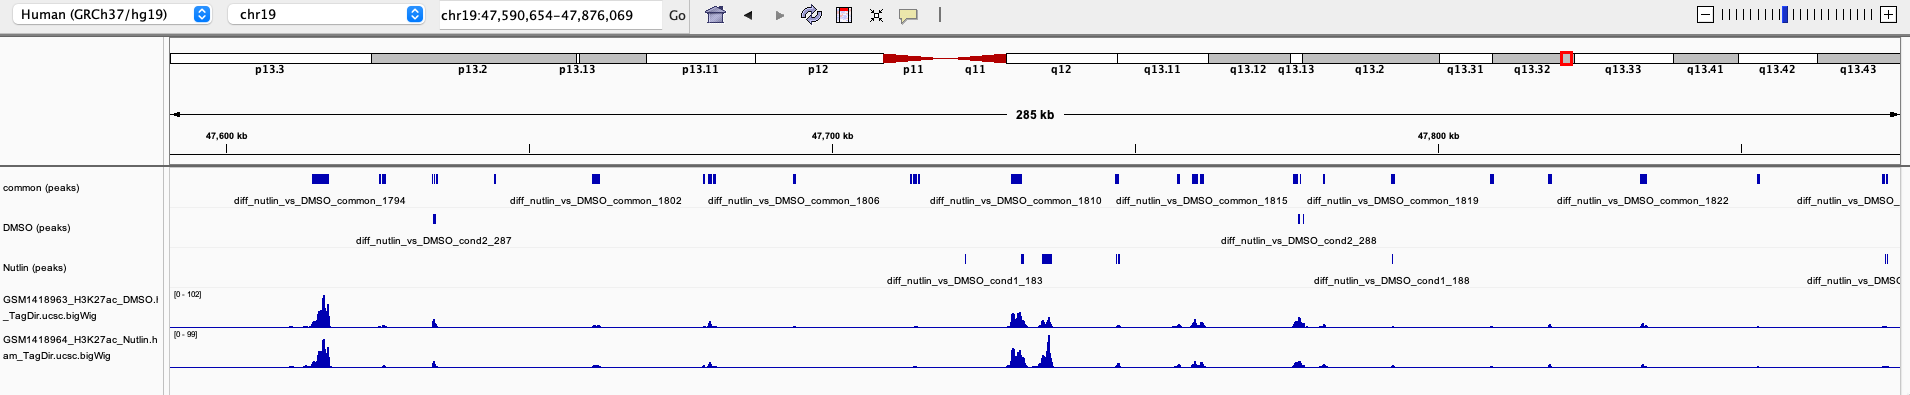

See the top regions for Condition 1 (= Nutlin).

In [63]:
cat diff_nutlin_vs_DMSO_c3.0_cond1.bed | sort -k 5 -gr | head

chr19	4972565	4973072	diff_nutlin_vs_DMSO_cond1_33	57.01951
chr19	44263172	44263832	diff_nutlin_vs_DMSO_cond1_157	52.49476
chr19	47722004	47722144	diff_nutlin_vs_DMSO_cond1_183	41.75992
chr19	41767439	41768428	diff_nutlin_vs_DMSO_cond1_136	41.35392
chr19	9733159	9733453	diff_nutlin_vs_DMSO_cond1_50	36.53617
chr19	46135221	46135928	diff_nutlin_vs_DMSO_cond1_172	34.97065
chr19	2189272	2189666	diff_nutlin_vs_DMSO_cond1_15	31.86173
chr19	52599344	52599788	diff_nutlin_vs_DMSO_cond1_201	31.25960
chr19	59107399	59109342	diff_nutlin_vs_DMSO_cond1_215	29.67731
chr19	41724302	41724699	diff_nutlin_vs_DMSO_cond1_135	28.34232
sort: fflush failed: 'standard output': Broken pipe
sort: write error


Let's look at BAX, we can indeed see the (small) increase in H3K27Ac signal - and importantly, it overlaps with the ChIP-seq peak. This is quite a sensitive technique!

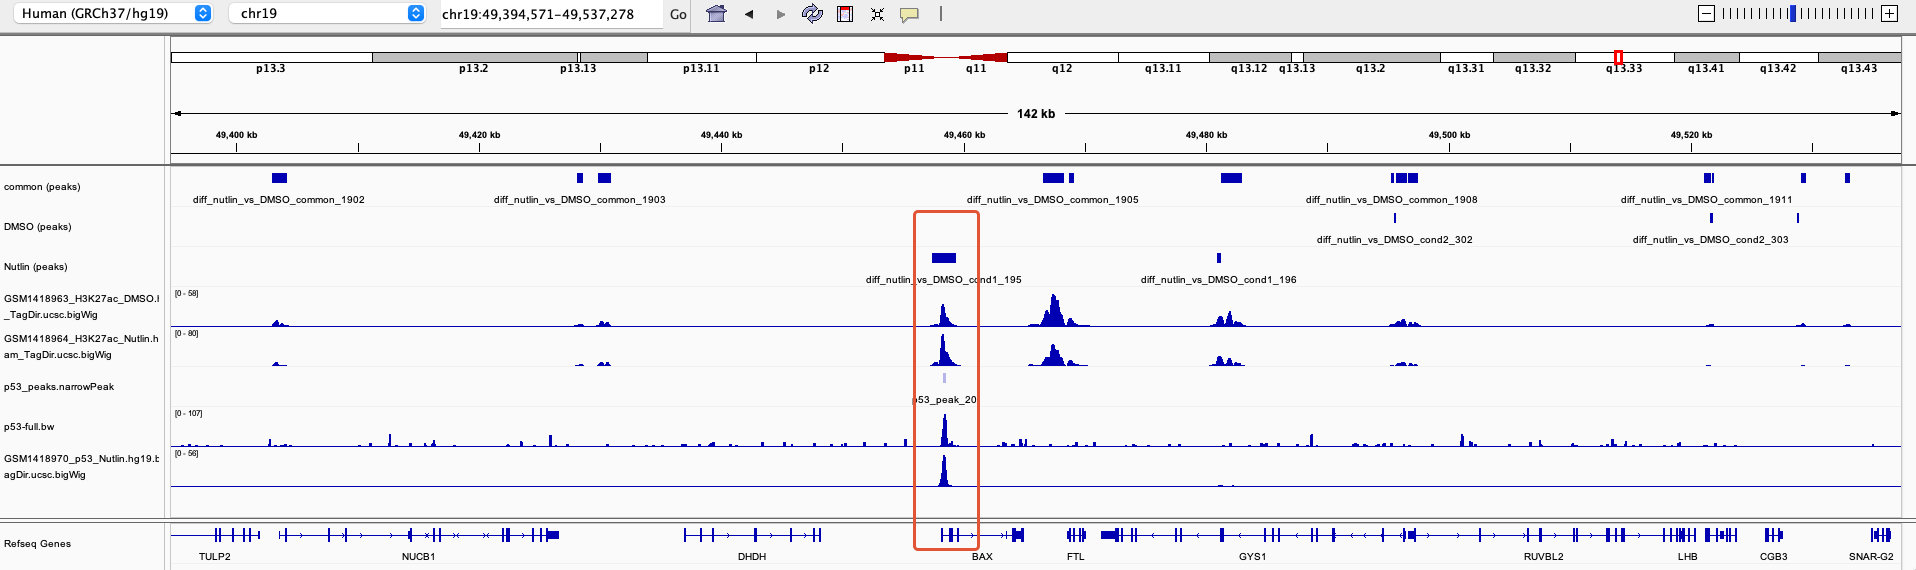

Following that, you can continue with additional functional/motif analysis as we will see in another class and notebook.

# Summary

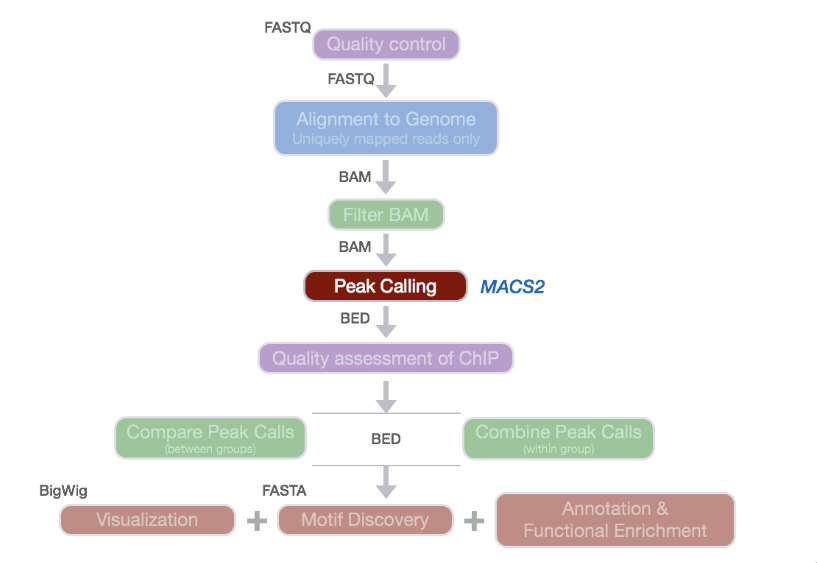